In [14]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 4.1 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np

# สร้างช่วงวันที่ 365 วัน
date_range = pd.date_range(start="2024-01-01", periods=365, freq="D")

# สร้างแนวโน้มรายรับ (Revenue)
np.random.seed(42)
base_revenue = 50000 + 10000 * np.sin(np.linspace(0, 12, 365))  # ฤดูกาล
random_noise = np.random.randint(-5000, 5000, size=365)  # ความผันผวน
revenue = base_revenue + random_noise

# สร้างแนวโน้มรายจ่าย (Expense)
base_expense = revenue * np.random.uniform(0.5, 0.7)  # รายจ่ายประมาณ 50-70% ของรายรับ
random_expense_noise = np.random.randint(-3000, 3000, size=365)  # ความผันผวน
expense = base_expense + random_expense_noise

# สร้างตัวแปรฤดูกาล (Seasonality) โดยใช้ sin เพื่อสร้างคลื่นของฤดูกาล
season = np.sin(2 * np.pi * date_range.dayofyear / 365)  # ฤดูกาลจะอยู่ในช่วง -1 ถึง 1

# สร้างตัวแปรอีเวนต์ (Event) โดยการสุ่มว่าเป็นช่วง High Season หรือไม่
event = np.random.choice([0, 1], size=365, p=[0.8, 0.2])  # 80% ไม่มีอีเวนต์, 20% มีอีเวนต์

# สร้างตัวแปรอัตราการเข้าพัก (Occupancy Rate) โดยสุ่มค่า
occupancy_rate = np.random.uniform(0.5, 0.9, size=365)  # อัตราการเข้าพักระหว่าง 50% ถึง 90%
occupancy_rate = occupancy_rate.round(2)

# สร้าง DataFrame
df = pd.DataFrame({
    "date": date_range,
    "revenue": revenue.astype(int),
    "expense": expense.astype(int),
    "event": event,
    "occupancy_rate": occupancy_rate
})

# บันทึกเป็น CSV
file_path = "hotel_revenue_expense.csv"
df.to_csv(file_path, index=False)
file_path


'hotel_revenue_expense.csv'

In [22]:
import pandas as pd
import numpy as np

# สร้างช่วงวันที่ 365 วัน
date_range = pd.date_range(start="2024-01-01", periods=365, freq="D")

# สร้างฟังก์ชันเพื่อคำนวณการสุ่มรายรับ, รายจ่าย และอัตราการเข้าพักตามฤดูกาล
def generate_revenue_expense_occupancy(month):
    # กำหนดช่วงของรายรับในแต่ละฤดูกาล
    if month in [3, 4]:  # ฤดูร้อน (มี.ค. - เม.ย.)
        revenue = np.random.randint(400000, 500000)
        expense = np.random.randint(100000, 200000)
        occupancy_rate = np.random.uniform(0.5, 0.7)  # ต่ำ
    elif month in [5, 6, 7, 8, 9, 10]:  # ฤดูฝน (พ.ค. - ต.ค.)
        revenue = np.random.randint(500000, 600000)
        expense = np.random.randint(200000, 400000)
        occupancy_rate = np.random.uniform(0.7, 0.9)  # สูง
    elif month in [11, 12, 1, 2]:  # ฤดูหนาว (พ.ย. - ก.พ.)
        revenue = np.random.randint(500000, 600000)
        expense = np.random.randint(200000, 400000)
        occupancy_rate = np.random.uniform(0.7, 0.9)  # สูง
    else:
        revenue = np.random.randint(400000, 500000)
        expense = np.random.randint(100000, 200000)
        occupancy_rate = np.random.uniform(0.5, 0.7)  # ต่ำ
    
    return revenue, expense, occupancy_rate

# สร้างการสุ่มข้อมูลตามเดือน
revenues = []
expenses = []
occupancy_rates = []
events = []

for i, date in enumerate(date_range):
    month = date.month
    revenue, expense, occupancy_rate = generate_revenue_expense_occupancy(month)
    
    revenues.append(revenue)
    expenses.append(expense)
    occupancy_rates.append(round(occupancy_rate, 2))
    
    # สุ่มว่าเป็นช่วง High Season หรือไม่
    event = np.random.choice([0, 1], p=[0.8, 0.2])
    events.append(event)

# สร้าง DataFrame
df = pd.DataFrame({
    "date": date_range,
    "revenue": revenues,
    "expense": expenses,
    "event": events,
    "occupancy_rate": occupancy_rates
})

# บันทึกเป็น CSV
file_path = "hotel_revenue_expense.csv"
df.to_csv(file_path, index=False)

file_path


'hotel_revenue_expense.csv'

In [1]:
month_list = ['ม.ค. 66', 'ก.พ. 66', 'มี.ค. 66', 'เม.ย. 66', 'พ.ค. 66', 'มิ.ย. 66', 'ก.ค. 66', 'ส.ค. 66', 'ก.ย. 66', 'ต.ค. 66', 'พ.ย. 66', 'ธ.ค. 66',
              'ม.ค. 67', 'ก.พ. 67', 'มี.ค. 67', 'เม.ย. 67', 'พ.ค. 67', 'มิ.ย. 67', 'ก.ค. 67', 'ส.ค. 67', 'ก.ย. 67', 'ต.ค. 67', 'พ.ย. 67', 'ธ.ค. 67']

In [5]:
import os
import pandas as pd

# กำหนดโฟลเดอร์ที่เก็บไฟล์ CSV
folder_path = '/Users/theeratdolchat/Downloads'

final_df = pd.DataFrame()

for month in month_list:
    file_path = os.path.join(folder_path, f'ม่อนธารารีสอร์ทล่าสุด - {month}.csv')
    df = pd.read_csv(file_path)
    # print(f"Column names in {month}:", df.columns.tolist())
    df.loc[:, 'วันที่'] = pd.to_datetime(df['วันที่'], format='%d/%m/%y').dt.strftime('%d/%m/%Y')
    df.loc[:, 'accuracy'] = (df['จำนวนห้อง'] / 800 * 100).round(2)
    df_selected = df[['วันที่', 'จำนวนห้อง', 'accuracy']]
    final_df = pd.concat([final_df, df_selected], ignore_index=True)

print(final_df)
file_path = "booking_trend_new.csv"
final_df.to_csv(file_path, index=False)

         วันที่  จำนวนห้อง  accuracy
0    01/01/2023        4.0       0.5
1    02/01/2023        0.0       0.0
2    03/01/2023        0.0       0.0
3    04/01/2023        0.0       0.0
4    05/01/2023        0.0       0.0
..          ...        ...       ...
789  29/12/2024        8.0       1.0
790  30/12/2024        8.0       1.0
791  31/12/2024        8.0       1.0
792         NaN        NaN       NaN
793         NaN        NaN       NaN

[794 rows x 3 columns]


/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_93490/2363266354.py:84: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_93490/2363266354.py:84: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_93490/2363266354.py:84: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_93490/2363266354.py:84: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_93490/2363266354.py:84: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_93490/2363

<Figure size 1600x1000 with 0 Axes>

/Users/theeratdolchat/Documents/finotel/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theeratdolchat/Documents/finotel/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theeratdolchat/Documents/finotel/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theeratdolchat/Documents/finotel/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theeratdolchat/Documents/finotel/.venv/lib/python3.13/site-packages

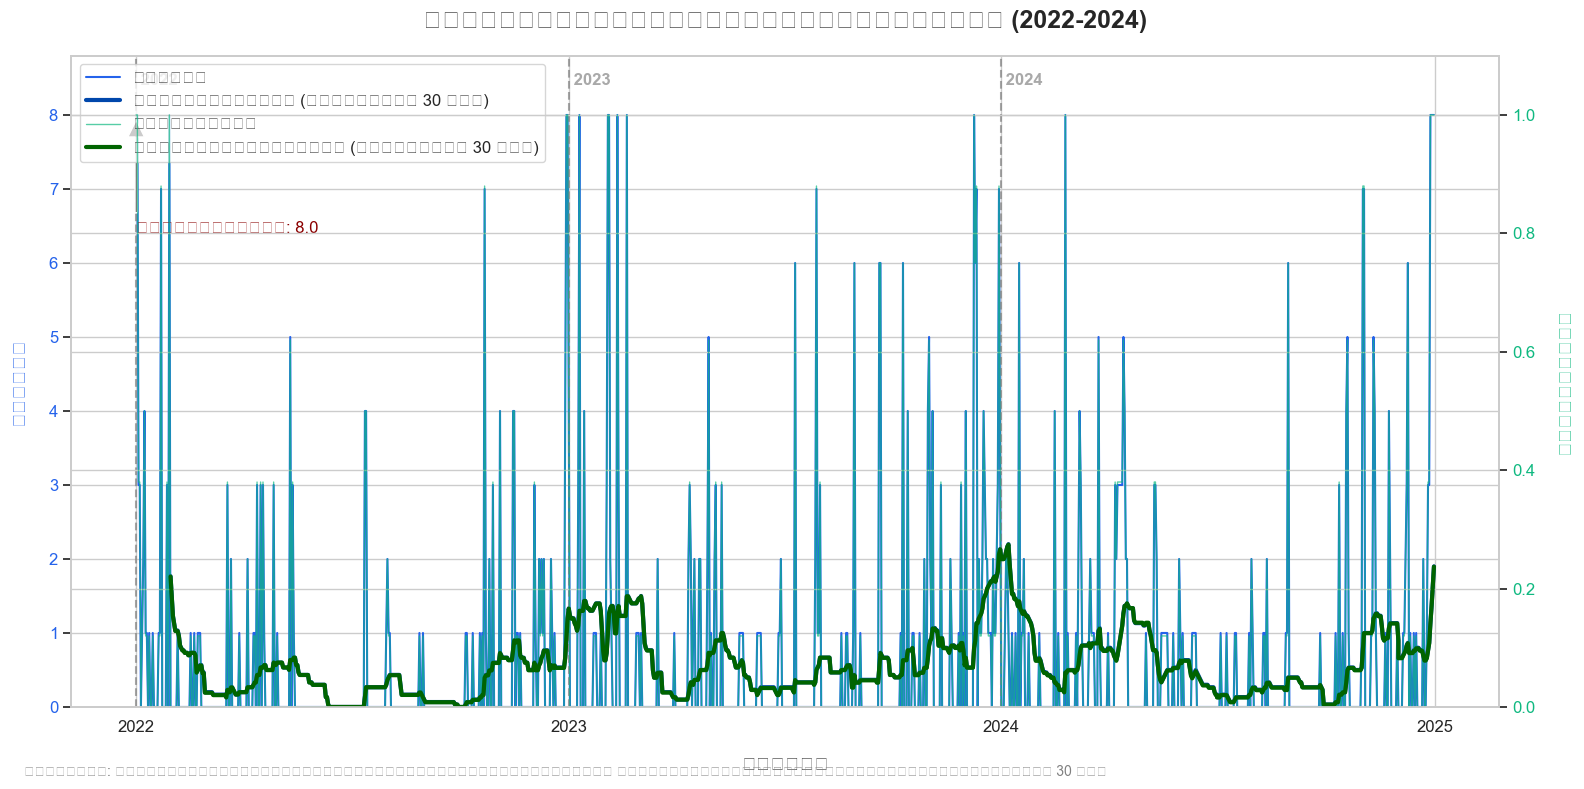


สถิติรายปี:
       booking                   accuracy          
          mean  max  min    sum      mean  max  min
date                                               
2022  0.482192  8.0  0.0  176.0  0.059918  1.0  0.0
2023  0.719346  8.0  0.0  264.0  0.089482  1.0  0.0
2024  0.656757  8.0  0.0  243.0  0.081459  1.0  0.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta
import random

df = pd.read_csv('2022-2024_booking.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# สร้างกราฟสวยงาม
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

# กำหนดสีและสไตล์
booking_color = '#2563EB'  # สีน้ำเงิน
accuracy_color = '#10B981'  # สีเขียว

# สร้างกราฟหลัก
fig, ax1 = plt.subplots(figsize=(16, 8))

# กราฟการจอง
ax1.set_xlabel('วันที่', fontsize=14, labelpad=15)
ax1.set_ylabel('การจอง', color=booking_color, fontsize=14, labelpad=15)
ax1.plot(df['date'], df['booking'], color=booking_color, linewidth=1.5, label='การจอง')

# เพิ่ม rolling average เพื่อดูแนวโน้ม
rolling_avg = df['booking'].rolling(window=30).mean()  # ค่าเฉลี่ยเคลื่อนที่ 30 วัน
ax1.plot(df['date'], rolling_avg, color='#0047AB', linewidth=3, label='แนวโน้มการจอง (ค่าเฉลี่ย 30 วัน)')

# สร้างแกน Y ด้านขวาสำหรับความแม่นยำ
ax2 = ax1.twinx()
ax2.set_ylabel('ความแม่นยำ', color=accuracy_color, fontsize=14, labelpad=15)
ax2.plot(df['date'], df['accuracy'], color=accuracy_color, linewidth=1, alpha=0.7, label='ความแม่นยำ')

# เพิ่ม rolling average สำหรับความแม่นยำ
rolling_acc = df['accuracy'].rolling(window=30).mean()
ax2.plot(df['date'], rolling_acc, color='#006400', linewidth=3, label='แนวโน้มความแม่นยำ (ค่าเฉลี่ย 30 วัน)')

# ตั้งค่าสีและขีดจำกัดของแกน
ax1.tick_params(axis='y', labelcolor=booking_color)
ax2.tick_params(axis='y', labelcolor=accuracy_color)
ax1.set_ylim(0, df['booking'].max() * 1.1)
ax2.set_ylim(0, 1.1)

# กำหนดรูปแบบของแกน x ให้แสดงเป็นช่วงเวลา
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# เพิ่มเส้นแบ่งปี
for year in range(2022, 2025):
    ax1.axvline(pd.Timestamp(f"{year}-01-01"), color='gray', linestyle='--', alpha=0.7)
    ax1.text(pd.Timestamp(f"{year}-01-01"), df['booking'].max() * 1.05, f' {year}', 
             fontsize=12, color='darkgray', fontweight='bold')

# เพิ่มการไฮไลท์เหตุการณ์สำคัญ (เช่น วันที่มีการจองสูงสุด)
max_booking_idx = df['booking'].idxmax()
max_booking_date = df.loc[max_booking_idx, 'date']

ax1.annotate(f'การจองสูงสุด: {df["booking"].max()}',
             xy=(max_booking_date, df['booking'].max()),
             xytext=(max_booking_date, df['booking'].max() * 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=12, color='darkred')

# เพิ่มคำอธิบายสำหรับกราฟ
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# เพิ่มชื่อกราฟ
plt.title('ข้อมูลการจองและความแม่นยำรายวัน (2022-2024)', fontsize=18, pad=20, fontweight='bold')

# เพิ่มข้อความอธิบายเพิ่มเติม
plt.figtext(0.02, 0.02, 'หมายเหตุ: ข้อมูลแสดงการจองรายวันและความแม่นยำในการคาดการณ์ โดยมีการเน้นแนวโน้มด้วยค่าเฉลี่ยเคลื่อนที่ 30 วัน', 
            fontsize=10, color='gray')

# กำหนดการเก็บพื้นที่ว่างรอบกราฟอย่างเหมาะสม
plt.tight_layout()

# บันทึกเป็นไฟล์รูปภาพความละเอียดสูง
plt.savefig('booking_accuracy_plot_2022_2024.png', dpi=300, bbox_inches='tight')

# แสดงกราฟ
plt.show()

# ถ้าต้องการดูสถิติสรุปข้อมูลเพิ่มเติม
yearly_stats = df.groupby(df['date'].dt.year).agg({
    'booking': ['mean', 'max', 'min', 'sum'],
    'accuracy': ['mean', 'max', 'min']
})

print("\nสถิติรายปี:")
print(yearly_stats)

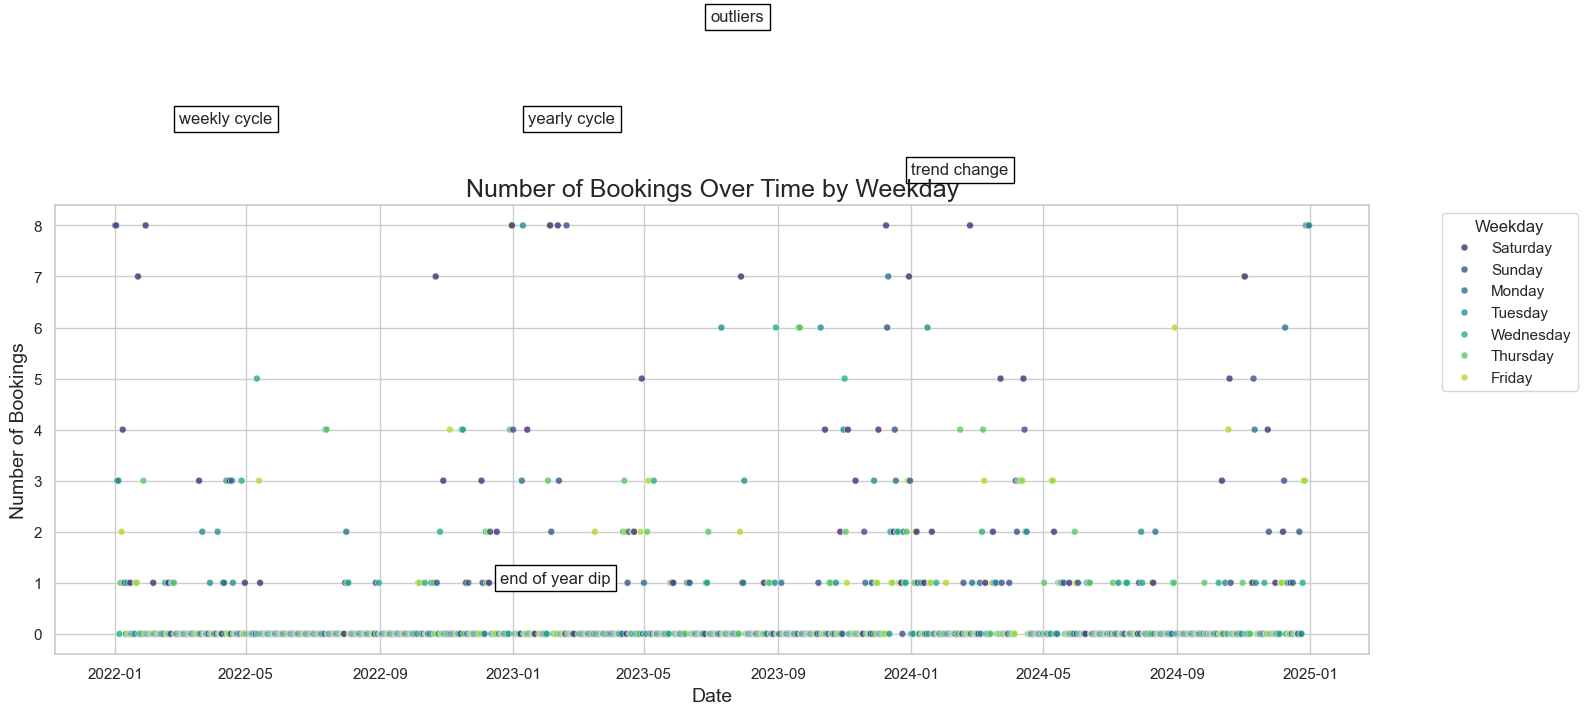

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# อ่านข้อมูลจาก CSV
df = pd.read_csv('2022-2024_booking.csv')  # เปลี่ยนชื่อไฟล์เป็นชื่อจริง

# แปลงวันที่
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# แยกวันในสัปดาห์
df['weekday'] = df['date'].dt.day_name()

# ตั้งค่ารูปแบบของ seaborn
sns.set(style='whitegrid', rc={'figure.figsize': (16, 8)})

# สร้าง scatter plot
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df,
    x='date',
    y='booking',
    hue='weekday',
    palette='viridis',
    s=25,
    alpha=0.8
)

# ใส่คำอธิบายประกอบเหมือนตัวอย่าง
plt.text(pd.to_datetime('2022-03-01'), 10, 'weekly cycle', bbox=dict(facecolor='white', edgecolor='black'))
plt.text(pd.to_datetime('2022-12-20'), 1, 'end of year dip', bbox=dict(facecolor='white', edgecolor='black'))
plt.text(pd.to_datetime('2023-01-15'), 10, 'yearly cycle', bbox=dict(facecolor='white', edgecolor='black'))
plt.text(pd.to_datetime('2023-07-01'), 12, 'outliers', bbox=dict(facecolor='white', edgecolor='black'))
plt.text(pd.to_datetime('2024-01-01'), 9, 'trend change', bbox=dict(facecolor='white', edgecolor='black'))

# ตั้งค่าแกน
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.title('Number of Bookings Over Time by Weekday', fontsize=18)
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผล
plt.tight_layout()
plt.show()


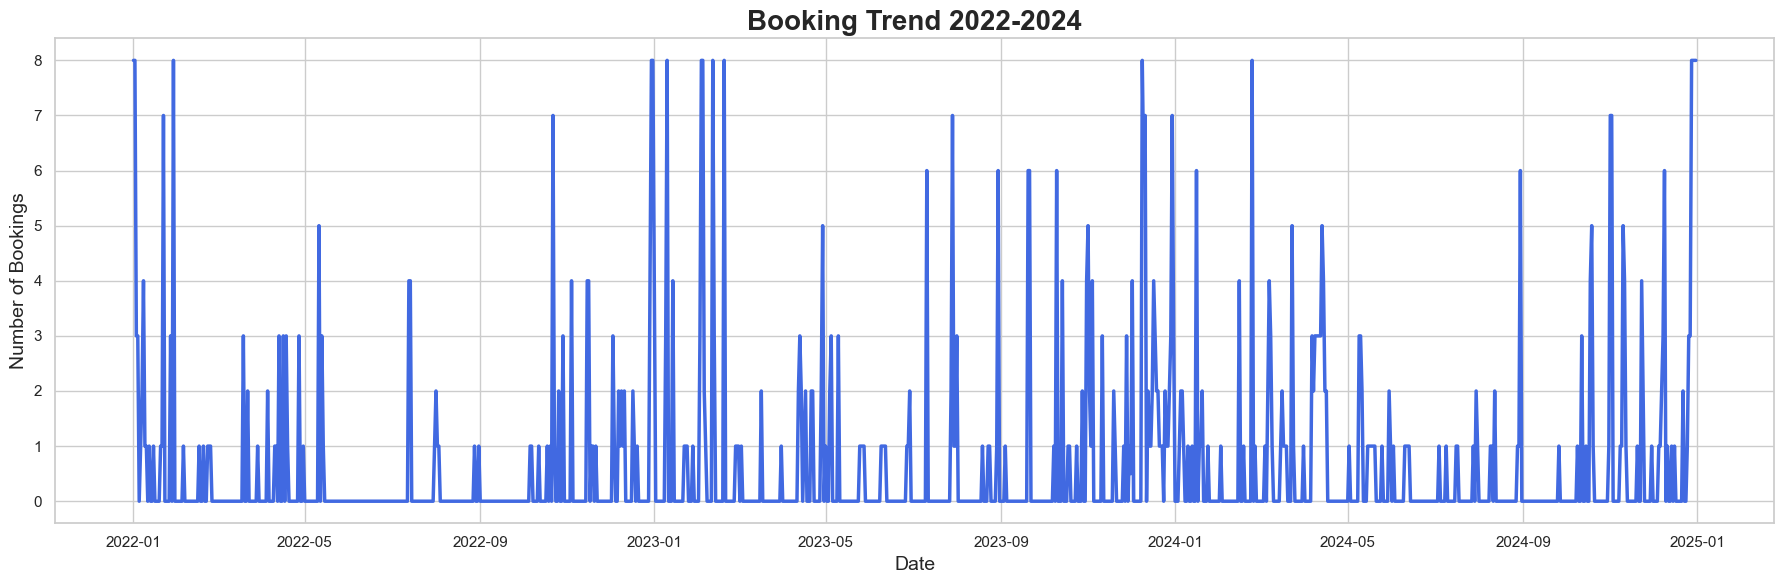

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# อ่านข้อมูล
df = pd.read_csv('2022-2024_booking.csv')  # เปลี่ยนชื่อไฟล์เป็นชื่อจริง

# แปลงคอลัมน์วันที่ให้เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# จัดเรียงข้อมูลตามวันที่
df = df.sort_values('date')

# กำหนดธีมและขนาดรูป
sns.set(style='whitegrid', rc={'figure.figsize': (18, 6)})

# สร้างกราฟเส้น
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x='date', y='booking', color='royalblue', linewidth=2.5)

# ใส่ชื่อกราฟและแกน
plt.title('Booking Trend 2022-2024', fontsize=20, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)

# ใส่คำอธิบายประกอบบางจุด
# plt.axvline(pd.to_datetime('2022-12-31'), color='gray', linestyle='--', alpha=0.7)
# plt.text(pd.to_datetime('2022-12-01'), df['booking'].min(), 'End of Year Dip', fontsize=12,
#          bbox=dict(facecolor='white', edgecolor='black'))

# plt.axvline(pd.to_datetime('2024-01-01'), color='gray', linestyle='--', alpha=0.7)
# plt.text(pd.to_datetime('2024-01-10'), df['booking'].max() * 0.9, 'New Year Spike?', fontsize=12,
#          bbox=dict(facecolor='white', edgecolor='black'))

# จัด layout ให้ไม่เบียดกัน
plt.tight_layout()
plt.show()


In [16]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from prophet import Prophet


train_df = pd.read_csv('2022-2023_booking.csv')
test_df = pd.read_csv('test_data_2024.csv')


In [5]:
train_df.drop('booking', axis=1, inplace=True)
test_df.drop('booking', axis=1, inplace=True)

train_df = train_df.drop_duplicates(subset=['ds'])
test_df = test_df.drop_duplicates(subset=['ds'])


train_df['ds'] = pd.to_datetime(train_df['ds'], format='%d/%m/%Y')
test_df['ds'] = pd.to_datetime(test_df['ds'], format='%d/%m/%Y')

In [4]:
holidays = pd.DataFrame({
        'holiday': ['New Year', 'New Year', 'New Year', 'Songkran', 'Songkran', 'Songkran', 
                   'New Year', 'New Year', 'New Year', 'Songkran', 'Songkran', 'Songkran',
                   'New Year', 'New Year', 'New Year', 'Songkran', 'Songkran', 'Songkran'],
        'ds': pd.to_datetime(['2022-12-30', '2022-12-31', '2023-01-01', 
                             '2022-04-13', '2022-04-14', '2022-04-15',
                             '2023-12-30', '2023-12-31', '2024-01-01', 
                             '2023-04-13', '2023-04-14', '2023-04-15',
                             '2024-12-30', '2024-12-31', '2025-01-01', 
                             '2024-04-13', '2024-04-14', '2024-04-15']),
        'lower_window': 0,
        'upper_window': 0
    })

In [6]:
print(f"จำนวนข้อมูลเทรน: {len(train_df)} วัน")
print(f"จำนวนข้อมูลทดสอบ: {len(test_df)} วัน")

จำนวนข้อมูลเทรน: 730 วัน
จำนวนข้อมูลทดสอบ: 366 วัน


In [7]:
train_df.head()

,ds,y
0,2022-01-01,1.00
1,2022-01-02,1.00
2,2022-01-03,0.38
3,2022-01-04,0.38
4,2022-01-05,0.00


In [ ]:
def train_prophet_model(train_data,holidays):
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        # holidays=holidays,
        seasonality_mode='multiplicative'
    )
    
    # เทรนโมเดล
    model.fit(train_data)
    return model

In [ ]:
def train_prophet_model(train_data):
    # สร้างโมเดล Prophet ที่ปรับแต่งสำหรับข้อมูลที่มีลักษณะเฉพาะนี้
    model = Prophet(
        yearly_seasonality=20,  # เพิ่มความซับซ้อนของรูปแบบตามฤดูกาลรายปี
        weekly_seasonality=True,
        daily_seasonality=False,  # จากกราฟไม่เห็นรูปแบบรายวันที่ชัดเจน
        seasonality_mode='multiplicative',  # เหมาะสมกับข้อมูลที่มีความผันผวนเพิ่มขึ้นตามเวลา
        changepoint_prior_scale=0.5,  # เพิ่มให้โมเดลปรับตัวต่อการเปลี่ยนแปลงแนวโน้มได้ดีขึ้น (เช่นช่วงปี 2024)
        seasonality_prior_scale=15.0,  # เพิ่มน้ำหนักให้กับรูปแบบตามฤดูกาล
        changepoint_range=0.95,  # อนุญาตให้มีจุดเปลี่ยนแปลงได้ถึงช่วงท้ายของข้อมูล
    )
    
    # model.add_changepoints(['2023-10-01', '2023-11-15', '2023-12-20'])

    # model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)
    # model.add_seasonality(name='monthly', period=30.4, fourier_order=5)
    
    model.fit(train_data)
    return model

In [8]:
model = train_prophet_model(train_df,holidays)

23:15:09 - cmdstanpy - INFO - Chain [1] start processing
23:15:10 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
model = Prophet()
model.fit(train_df)

22:45:42 - cmdstanpy - INFO - Chain [1] start processing
22:45:42 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=366)
forecast = model.predict(future)

In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1091,2024-12-27,0.392654,0.176243,0.627020
1092,2024-12-28,0.585965,0.364608,0.822011
1093,2024-12-29,0.398730,0.148094,0.627468
1094,2024-12-30,0.386003,0.162081,0.608742
1095,2024-12-31,0.417097,0.173445,0.644882


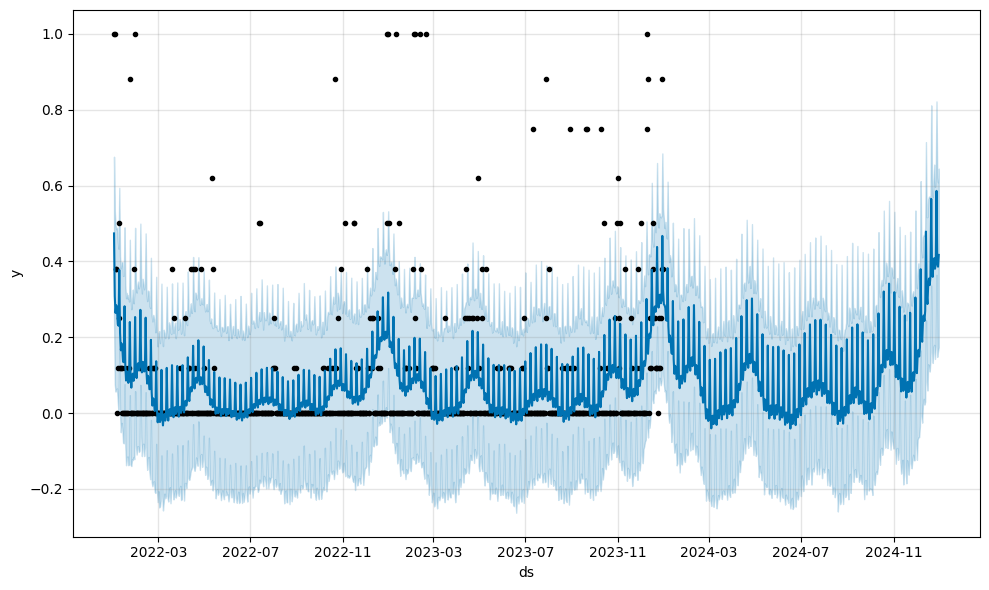

In [11]:
fig1 = model.plot(forecast)

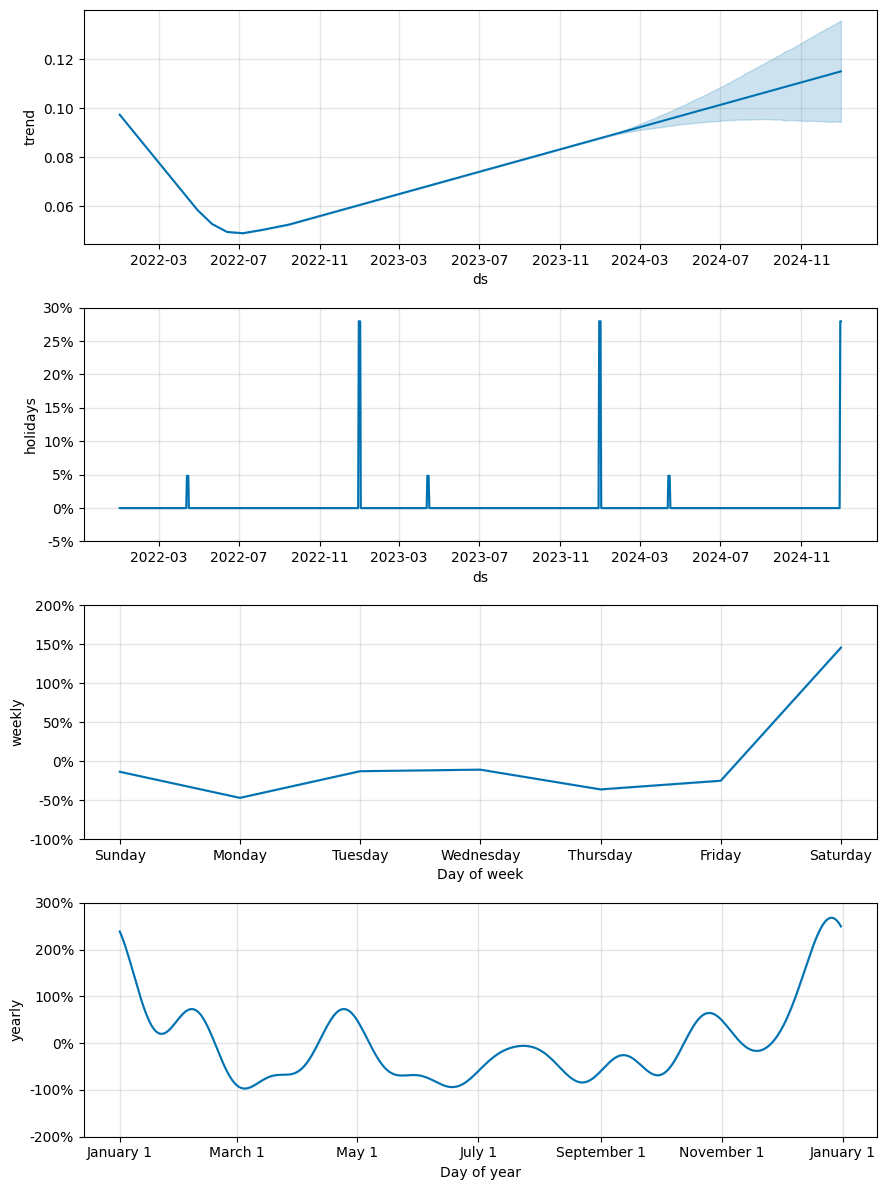

In [12]:
fig2 = model.plot_components(forecast)

In [13]:
forecast_test = forecast[forecast['ds'] >= '2024-01-01']

In [18]:
y_predicted = forecast_test['yhat'].values
y_true = test_df['y'].values

In [14]:
actual_2024 = train_df[train_df['ds'] >= '2024-01-01']
prediction_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] < '2025-01-01')]

In [15]:
comparison = pd.merge(
    actual_2024[['ds', 'y']], 
    prediction_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 
    on='ds', 
    how='inner'
)

In [25]:
def calculate_mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [26]:
mae = mean_absolute_error(y_true, y_predicted)
rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
r2 = r2_score(y_true, y_predicted)
mape = calculate_mape(y_true, y_predicted)

In [27]:
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')
print(f'MAPE: {mape}')

MAE: 0.12405739588968927
RMSE: 0.1836510336178009
R-squared: 0.00783169727093902
MAPE: 72.14211893872553


In [14]:
import pandas as pd
from datetime import datetime

# อ่านข้อมูลจาก CSV
df = pd.read_csv('booking_trend.csv')

# แปลงคอลัมน์วันที่เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# ตั้งวันที่เป็น index
df.set_index('date', inplace=True)

# ตรวจสอบข้อมูล
print(df)


            booking  accuracy
date                         
2022-01-01      8.0      1.00
2022-01-02      8.0      1.00
2022-01-03      3.0      0.38
2022-01-04      3.0      0.38
2022-01-05      0.0      0.00
...             ...       ...
2022-12-27      0.0      0.00
2022-12-28      0.0      0.00
2022-12-29      4.0      0.50
2022-12-30      8.0      1.00
2022-12-31      8.0      1.00

[365 rows x 2 columns]


In [12]:
# คำนวณค่าเฉลี่ยของจำนวนห้องที่จองในแต่ละเดือน
monthly_avg_rooms = df.resample('M').mean()['booking']
print("ค่าเฉลี่ยจำนวนห้องที่จองในแต่ละเดือน:")
print(monthly_avg_rooms)


/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_93490/1485780768.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rooms = df.resample('M').mean()['booking']


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ข้อมูลการจองห้องพัก 5 รายการแรก:
        date  booking  accuracy
0 2022-01-01      8.0      1.00
1 2022-01-02      8.0      1.00
2 2022-01-03      3.0      0.38
3 2022-01-04      3.0      0.38
4 2022-01-05      0.0      0.00

สรุปข้อมูล:
                                date     booking    accuracy
count                            365  365.000000  365.000000
mean   2022-07-01 23:59:59.999999744    0.482192    0.059918
min              2022-01-01 00:00:00    0.000000    0.000000
25%              2022-04-02 00:00:00    0.000000    0.000000
50%              2022-07-02 00:00:00    0.000000    0.000000
75%              2022-10-01 00:00:00    0.000000    0.000000
max              2022-12-31 00:00:00    8.000000    1.000000
std                              NaN    1.329230    0.166335


22:18:53 - cmdstanpy - INFO - Chain [1] start processing
22:18:55 - cmdstanpy - INFO - Chain [1] done processing



ทำนายจำนวนห้องที่จองเฉลี่ยรายเดือนในปี 2023:
           yhat_rounded  occupancy_rate_rounded
month                                          
January        0.989355               12.370323
February       0.500357                6.249286
March          0.393548                4.928710
April          2.275667               28.452333
May            1.468065               18.351290
June           0.557333                6.965667
July           1.318387               16.480323
August         0.929032               11.612258
September      0.613000                7.659000
October        3.315806               41.451613
November       3.137333               39.212000
December       3.872258               48.390645

ทำนายจำนวนห้องที่จองเฉลี่ยตามวันในสัปดาห์ในปี 2023:
             yhat_rounded  occupancy_rate_rounded
day_of_week                                      
Monday           0.803846               10.049808
Tuesday          1.047308               13.092885
Wednesday        1.026538    

/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/3689299698.py:132: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/3689299698.py:132: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/3689299698.py:132: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/3689299698.py:132: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/3689299698.py:132: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/i

<Figure size 1400x700 with 0 Axes>

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/s

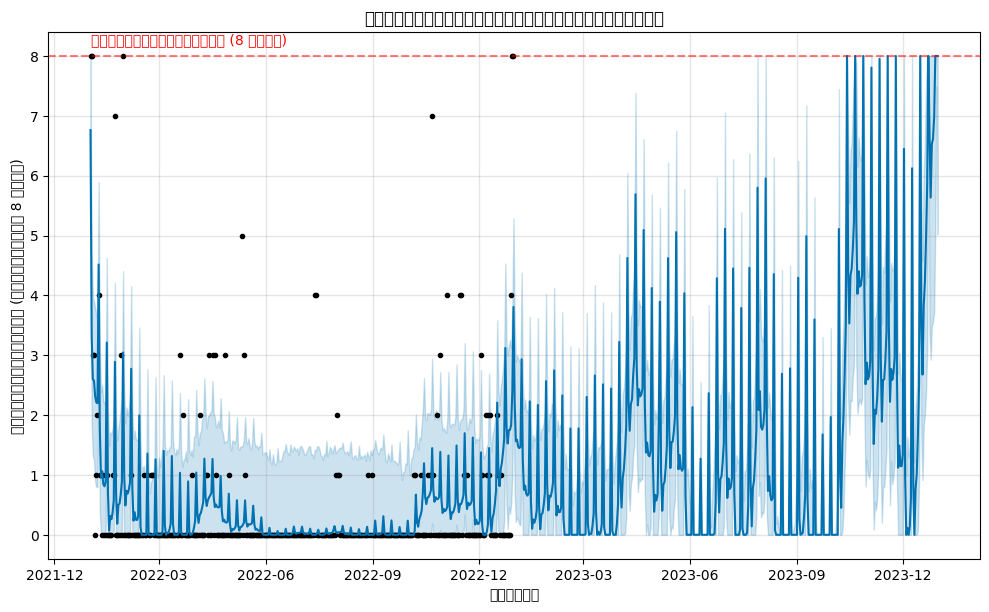

<Figure size 1400x1000 with 0 Axes>

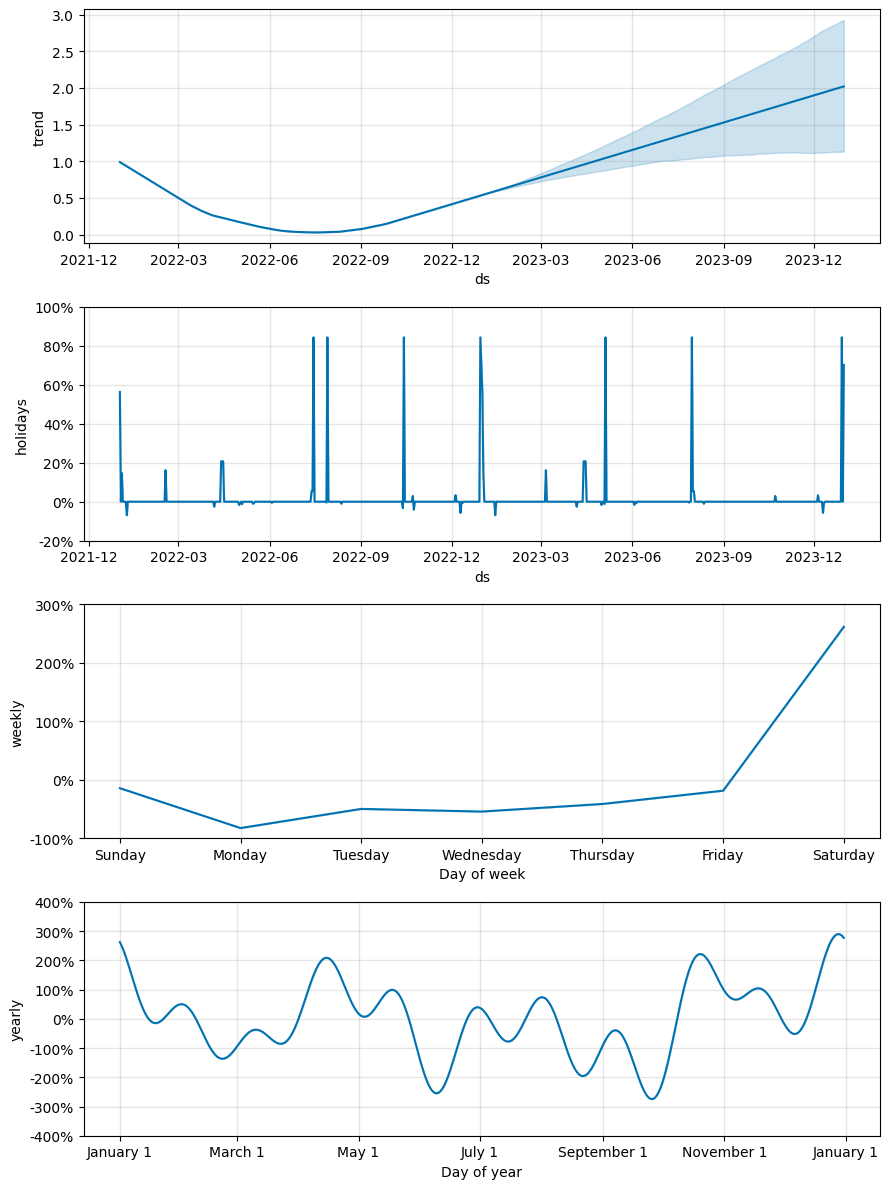

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3593 (\N{THAI CHARACTER CHO CHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/

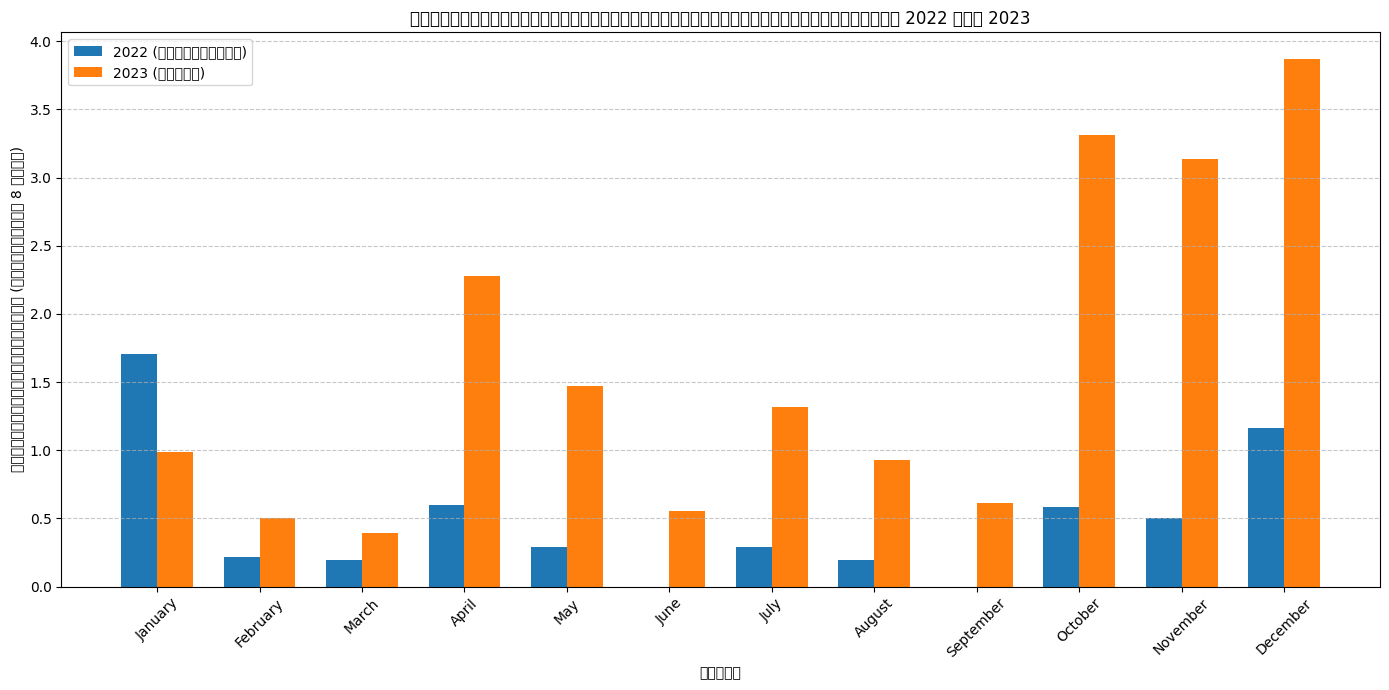

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


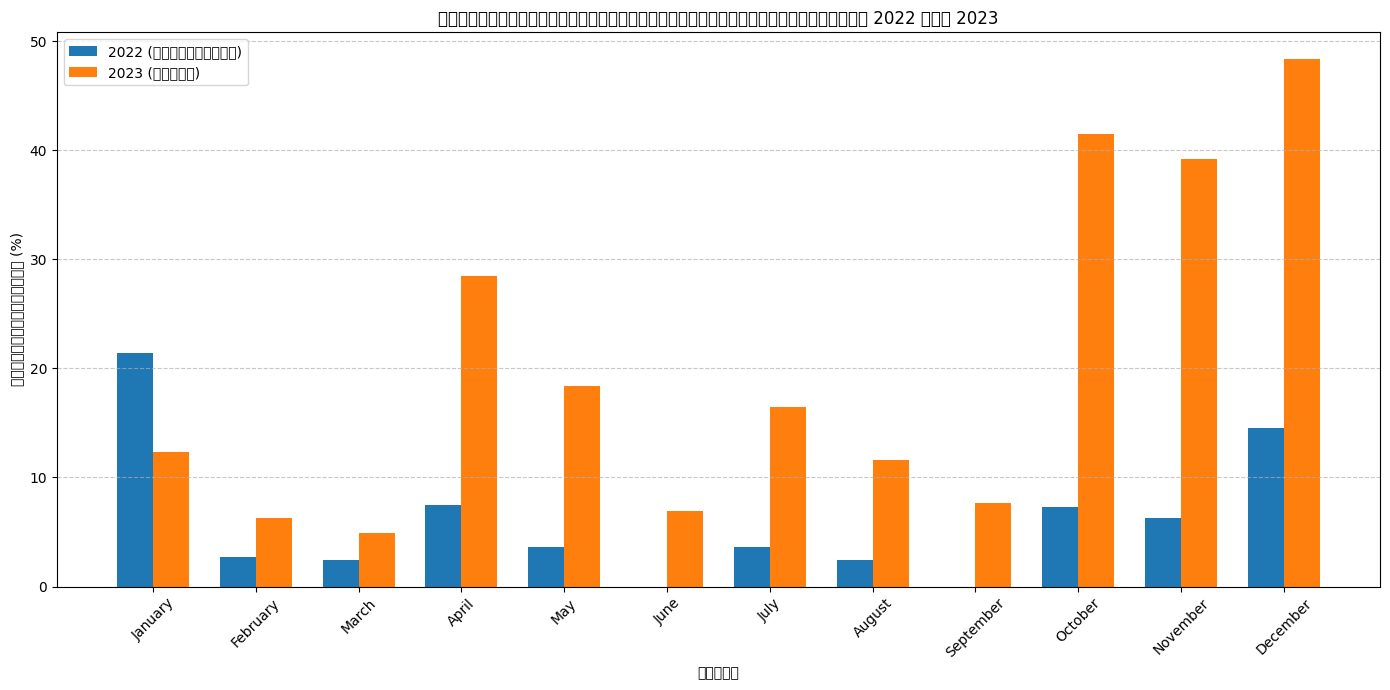

/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/theerat/Documents/hotel-manager/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3608 (\N{THAI CHARACTER THO THONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


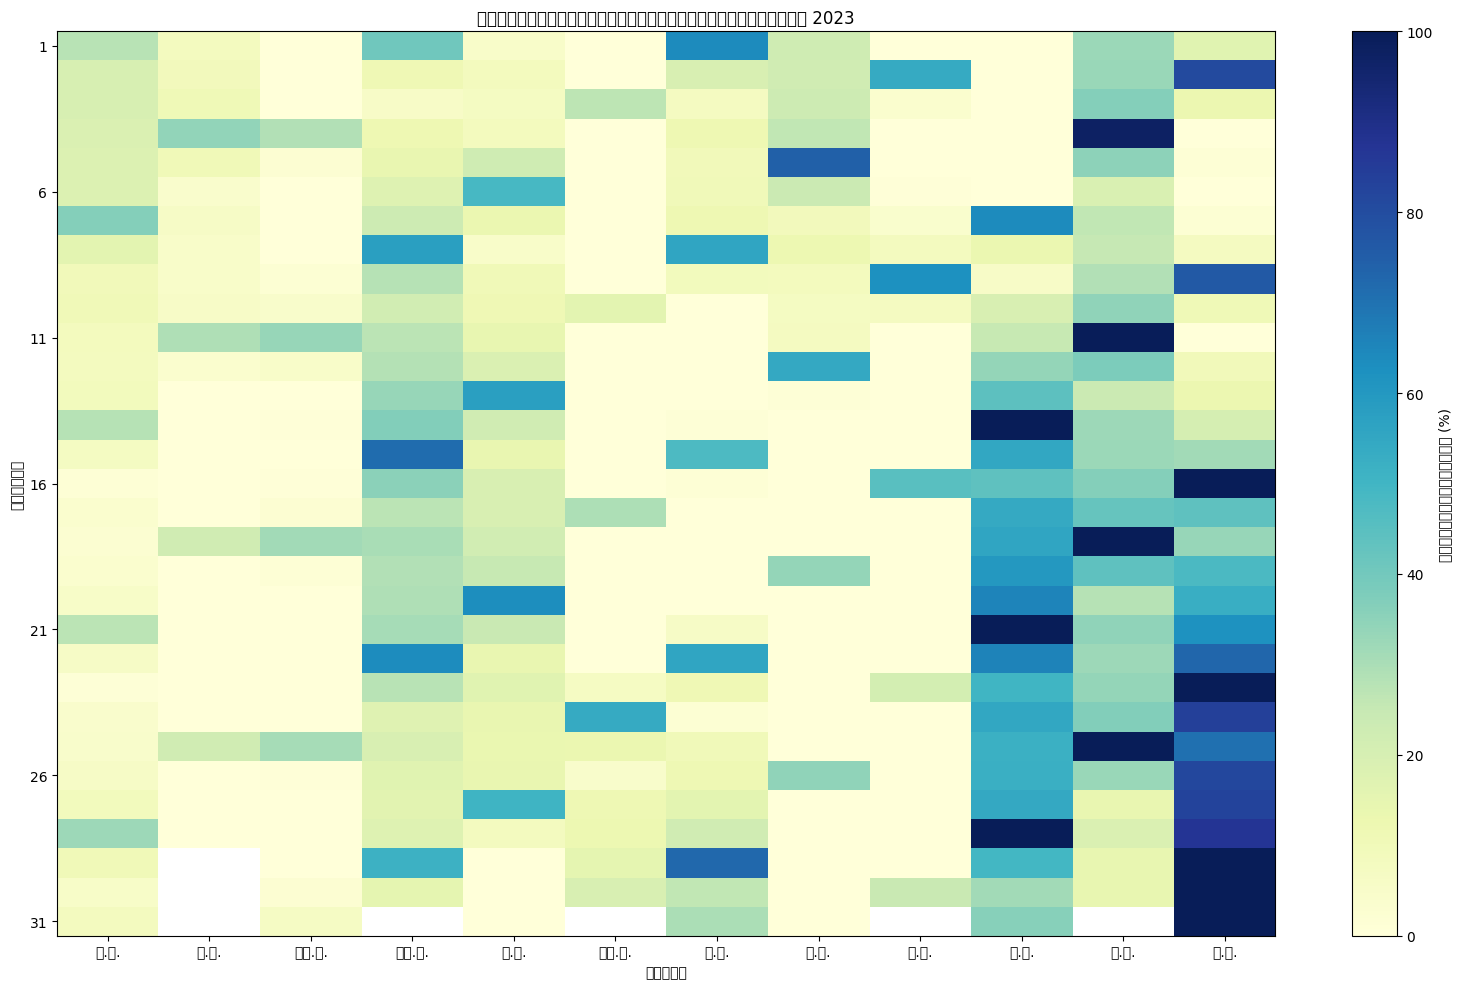


บันทึกผลการทำนายรายวันเรียบร้อยแล้วที่ booking_forecast_daily_2023.csv
บันทึกผลการทำนายรายเดือนเรียบร้อยแล้วที่ booking_forecast_monthly_2023.csv


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('booking_trend.csv')

# แปลงคอลัมน์วันที่เป็น datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# ตรวจสอบข้อมูล
print("ข้อมูลการจองห้องพัก 5 รายการแรก:")
print(df.head())

print("\nสรุปข้อมูล:")
print(df.describe())

# คำนวณอัตราการเข้าพัก (Occupancy Rate) รายวัน
df['occupancy_rate'] = df['booking'] / 8 * 100  # เป็นเปอร์เซ็นต์

# สร้าง DataFrame ที่เหมาะสมกับ Prophet
df_prophet = df[['date', 'booking']].rename(columns={'date': 'ds', 'booking': 'y'})

# สร้างวันหยุดไทยสำหรับ Prophet
thai_holidays = pd.DataFrame({
    'holiday': ['thai_newyear', 'thai_newyear', 'thai_newyear',
                'thai_newyear', 'thai_newyear', 'thai_newyear'],
    'ds': pd.to_datetime(['2022-04-13', '2022-04-14', '2022-04-15',  # สงกรานต์ 2022
                          '2023-04-13', '2023-04-14', '2023-04-15']),  # สงกรานต์ 2023
    'lower_window': 0,
    'upper_window': 0,
})

# สร้างโมเดล Prophet ที่เน้นความเป็นฤดูกาลรายปีและรายสัปดาห์
model = Prophet(
    yearly_seasonality=True,    # เปิดใช้ความเป็นฤดูกาลรายปี
    weekly_seasonality=True,    # เปิดใช้ความเป็นฤดูกาลรายสัปดาห์
    daily_seasonality=False,
    seasonality_mode='multiplicative',  # ใช้โหมดแบบคูณเพื่อแสดงความแตกต่างของฤดูกาลได้ชัดเจน
    seasonality_prior_scale=10,  # เพิ่มค่านี้เพื่อให้น้ำหนักกับความเป็นฤดูกาลมากขึ้น
    changepoint_prior_scale=0.05,  # ควบคุมความยืดหยุ่นของเทรนด์
    holidays=thai_holidays  # เพิ่มวันหยุดที่กำหนดเอง
)

# เพิ่มวันหยุดประเทศไทย
model.add_country_holidays(country_name='TH')

# ฟิตโมเดล
model.fit(df_prophet)

# ทำนายจำนวนห้องที่จองในอนาคต 365 วัน
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

# ประมวลผลการทำนาย
# กำหนดให้การทำนายต้องไม่เกิน 8 ห้อง และไม่น้อยกว่า 0
forecast['yhat'] = forecast['yhat'].clip(lower=0, upper=8)
forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0, upper=8)
forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0, upper=8)

# คำนวณอัตราการเข้าพัก (Occupancy Rate) จากการทำนาย
forecast['occupancy_rate'] = forecast['yhat'] / 8 * 100

# สร้างคอลัมน์เดือนและวันในสัปดาห์เพื่อการวิเคราะห์
forecast['month'] = forecast['ds'].dt.month_name()
forecast['day_of_week'] = forecast['ds'].dt.day_name()
forecast['year'] = forecast['ds'].dt.year

# แก้ไขจาก next_year = datetime.now().year + 1 เป็นการกำหนดค่าคงที่ 2023
next_year = 2023
next_year_forecast = forecast[forecast['year'] == next_year].copy()
next_year_forecast['yhat_rounded'] = np.round(next_year_forecast['yhat'], 2)
next_year_forecast['occupancy_rate_rounded'] = np.round(next_year_forecast['occupancy_rate'], 2)

print(f"\nทำนายจำนวนห้องที่จองเฉลี่ยรายเดือนในปี {next_year}:")
monthly_avg = next_year_forecast.groupby('month')[['yhat_rounded', 'occupancy_rate_rounded']].mean()
# เรียงเดือนให้ถูกต้อง
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)
print(monthly_avg)

# วิเคราะห์วันในสัปดาห์ที่มีการจองมากที่สุด
print(f"\nทำนายจำนวนห้องที่จองเฉลี่ยตามวันในสัปดาห์ในปี {next_year}:")
day_of_week_avg = next_year_forecast.groupby('day_of_week')[['yhat_rounded', 'occupancy_rate_rounded']].mean()
# เรียงวันในสัปดาห์ให้ถูกต้อง
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_avg = day_of_week_avg.reindex(day_order)
print(day_of_week_avg)

# แสดงกราฟการทำนาย
plt.figure(figsize=(14, 7))
fig = model.plot(forecast)
plt.title('การทำนายจำนวนห้องที่จองในอนาคต')
plt.xlabel('วันที่')
plt.ylabel('จำนวนห้องที่จอง (จากทั้งหมด 8 ห้อง)')
plt.axhline(y=8, color='r', linestyle='--', alpha=0.5)
plt.text(future['ds'].min(), 8.2, 'จำนวนห้องทั้งหมด (8 ห้อง)', color='r')

# แสดงองค์ประกอบของการทำนาย เพื่อดูความเป็นฤดูกาล
plt.figure(figsize=(14, 10))
components_fig = model.plot_components(forecast)
plt.tight_layout()

# แสดงกราฟเปรียบเทียบการจองตามเดือน
plt.figure(figsize=(14, 7))

# ข้อมูลจริงจากปี 2022
actual_data = df.copy()
actual_data['month'] = actual_data['date'].dt.month_name()
actual_monthly = actual_data.groupby('month')['booking'].mean()
actual_monthly = actual_monthly.reindex(month_order)

# ข้อมูลทำนายสำหรับปีหน้า
pred_monthly = monthly_avg['yhat_rounded']

# สร้างกราฟเปรียบเทียบ
bar_width = 0.35
x = np.arange(len(month_order))

plt.bar(x - bar_width/2, actual_monthly, bar_width, label='2022 (ข้อมูลจริง)')
plt.bar(x + bar_width/2, pred_monthly, bar_width, label=f'{next_year} (ทำนาย)')

plt.xlabel('เดือน')
plt.ylabel('จำนวนห้องที่จองเฉลี่ย (จากทั้งหมด 8 ห้อง)')
plt.title(f'เปรียบเทียบจำนวนห้องที่จองเฉลี่ยรายเดือนระหว่างปี 2022 และ {next_year}')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# สร้างกราฟแสดงอัตราการเข้าพัก (Occupancy Rate) รายเดือน
plt.figure(figsize=(14, 7))
plt.bar(x - bar_width/2, actual_monthly/8*100, bar_width, label='2022 (ข้อมูลจริง)')
plt.bar(x + bar_width/2, monthly_avg['occupancy_rate_rounded'], bar_width, label=f'{next_year} (ทำนาย)')

plt.xlabel('เดือน')
plt.ylabel('อัตราการเข้าพัก (%)')
plt.title(f'เปรียบเทียบอัตราการเข้าพักรายเดือนระหว่างปี 2022 และ {next_year}')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# แก้ไข heatmap ให้แสดงผลได้
plt.figure(figsize=(16, 10))

# สร้างข้อมูลสำหรับฮีทแมป
pivot_data = next_year_forecast.copy()
pivot_data['day'] = pivot_data['ds'].dt.day
pivot_data['month_num'] = pivot_data['ds'].dt.month

# สร้างตารางรายวันแยกตามเดือน
# จัดการกับปัญหาวันที่ไม่มีในบางเดือน โดยใช้ pivot table แบบมี fill_value
heatmap_data = pivot_data.pivot_table(
    index='day', 
    columns='month_num', 
    values='occupancy_rate_rounded', 
    aggfunc='mean',
    fill_value=np.nan  # ใช้ NaN สำหรับวันที่ไม่มีในบางเดือน
)

# ใช้เทคนิค masked array เพื่อซ่อนค่า NaN ในการแสดงผล
mask = np.isnan(heatmap_data.values)
masked_data = np.ma.masked_array(heatmap_data.values, mask)

# พล็อตฮีทแมปด้วย masked array
plt.imshow(masked_data, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='อัตราการเข้าพัก (%)')
plt.title(f'การทำนายอัตราการเข้าพักรายวันในปี {next_year}')
plt.xlabel('เดือน')
plt.ylabel('วันที่')
plt.xticks(np.arange(12), ['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()

plt.show()

# บันทึกผลการทำนาย
# ผลการทำนายรายวันสำหรับปี 2023
next_year_forecast[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'yhat_lower', 'yhat_upper']].to_csv(
    f'booking_forecast_daily_{next_year}.csv', index=False)

# ผลการทำนายรายเดือนสำหรับปี 2023
monthly_summary = next_year_forecast.groupby('month').agg({
    'yhat_rounded': 'mean',
    'occupancy_rate_rounded': 'mean',
    'yhat_lower': 'mean',
    'yhat_upper': 'mean'
}).reset_index()

monthly_summary = monthly_summary.set_index('month').reindex(month_order).reset_index()
monthly_summary.to_csv(f'booking_forecast_monthly_{next_year}.csv', index=False)

print(f"\nบันทึกผลการทำนายรายวันเรียบร้อยแล้วที่ booking_forecast_daily_{next_year}.csv")
print(f"บันทึกผลการทำนายรายเดือนเรียบร้อยแล้วที่ booking_forecast_monthly_{next_year}.csv")

Revenue Planning and Dynamic Pricing Strategy Report

Projected Monthly Revenue:
        month  estimated_revenue  target_revenue
4     January          116337.30      127971.030
3    February           53144.62       58459.082
7       March           39127.92       43040.712
0       April          293392.17      322731.387
8         May          136578.32      150236.152
6        June           49102.24       54012.464
5        July          134227.85      147650.635
1      August           97464.69      107211.159
11  September           62789.15       69068.065
10    October          354130.57      389543.627
9    November          321788.12      353966.932
2    December          607903.44      668693.784

Projected Annual Revenue: 2,265,986.39 THB
Annual Revenue Target: 2,492,585.03 THB

Promotion Plan for Low Occupancy Periods:
       month  occupancy_rate         promotion_type  discount_percentage  \
0    January       12.370323    Early Bird Discount                   15   
1  

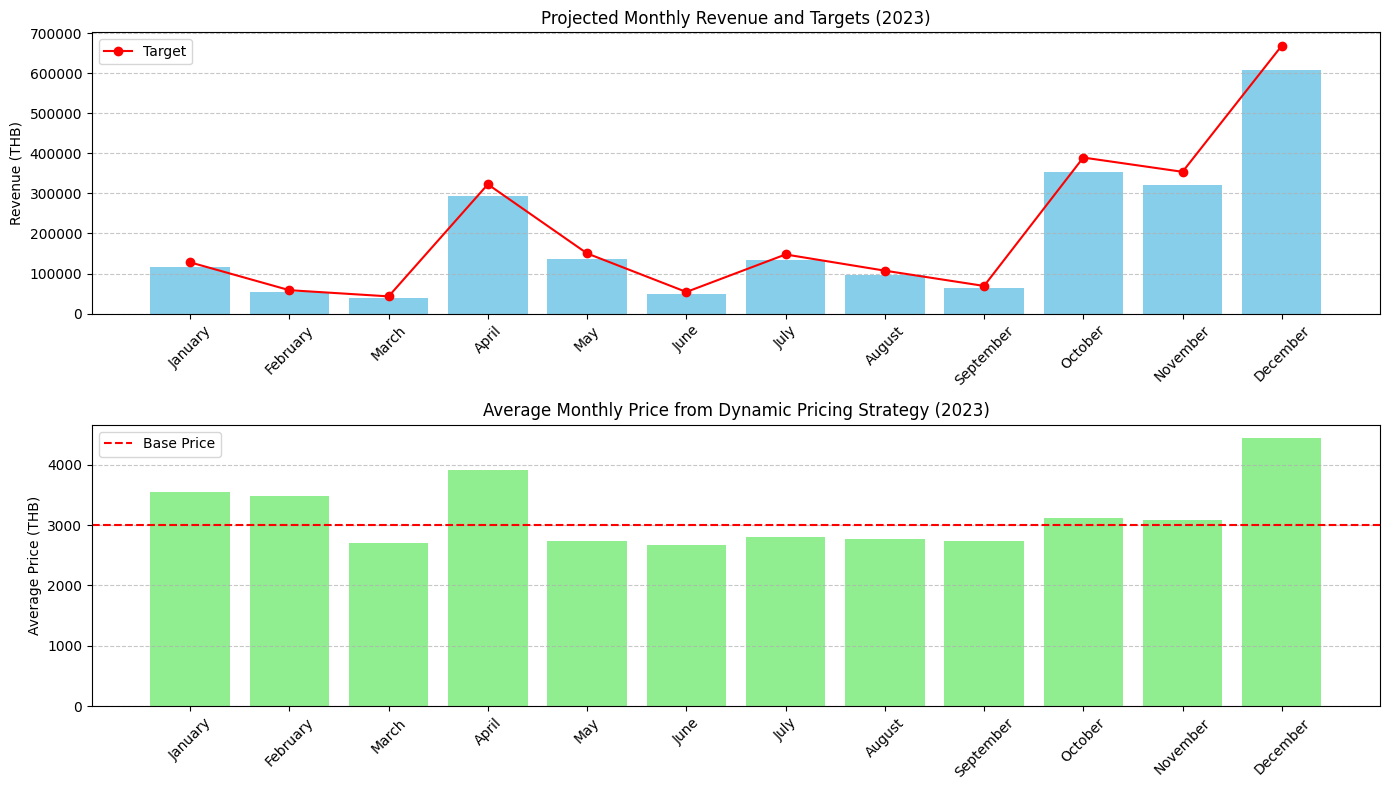

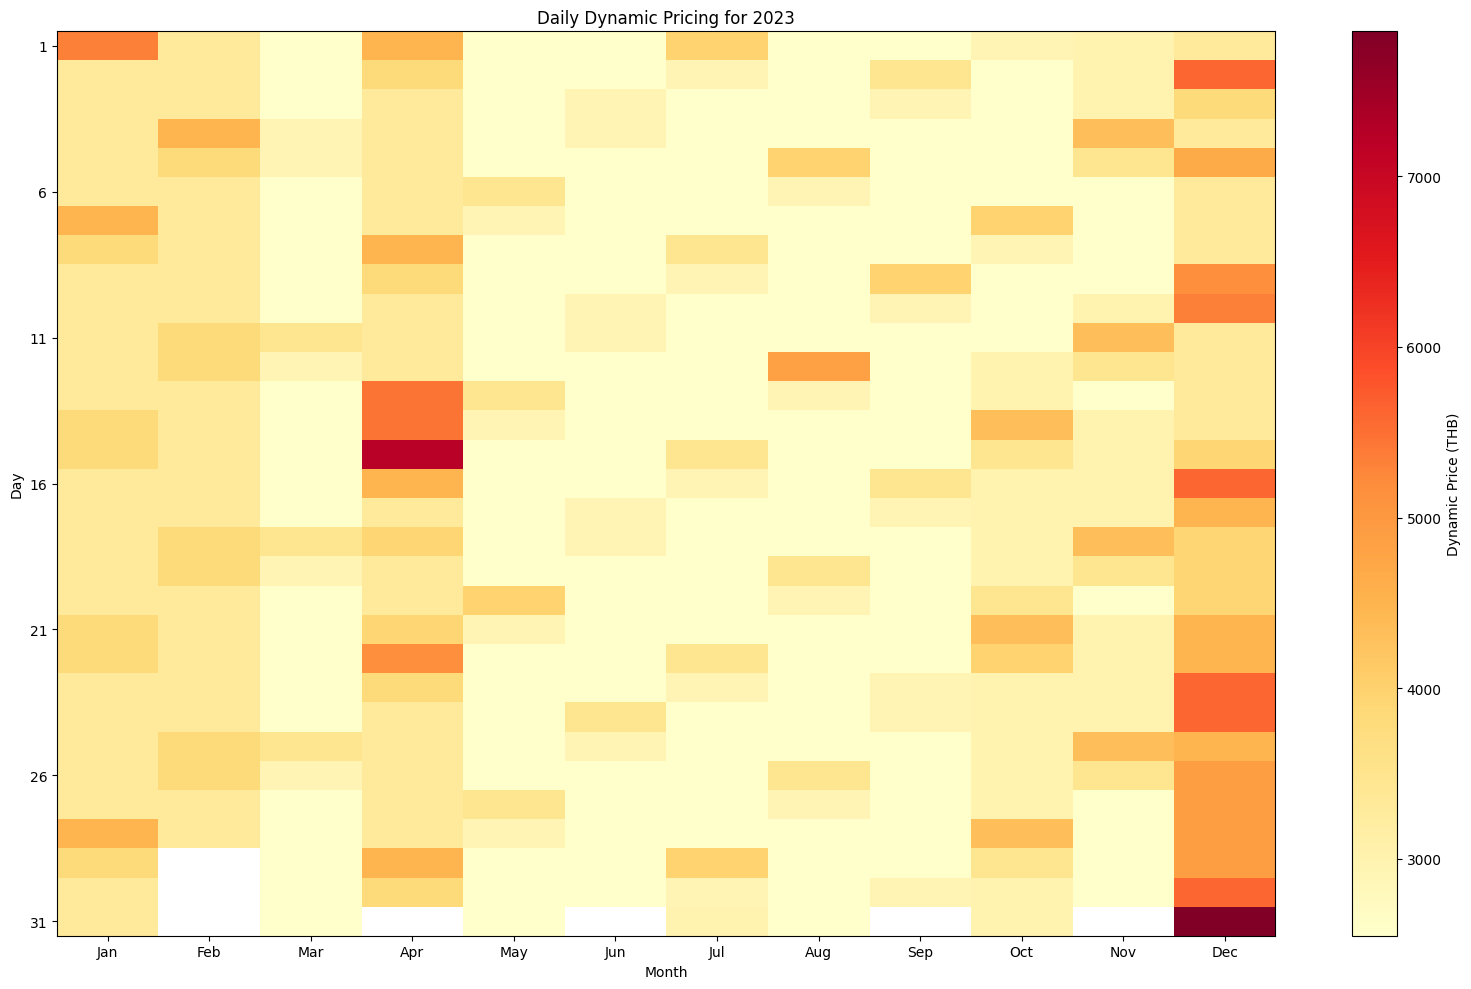

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# 1. Load the saved forecast data
forecast_daily = pd.read_csv('booking_forecast_daily_2023.csv')
forecast_monthly = pd.read_csv('booking_forecast_monthly_2023.csv')

# Convert date column to datetime format
forecast_daily['ds'] = pd.to_datetime(forecast_daily['ds'])

# Add month and day of week columns
forecast_daily['month'] = forecast_daily['ds'].dt.month_name()
forecast_daily['day_of_week'] = forecast_daily['ds'].dt.day_name()
forecast_daily['is_weekend'] = forecast_daily['day_of_week'].isin(['Saturday', 'Sunday'])

# Add columns for Thai holidays (example - you may need to add other holidays)
thai_holidays = {
    '2023-01-01': 'New Year\'s Day',
    '2023-04-13': 'Songkran',
    '2023-04-14': 'Songkran',
    '2023-04-15': 'Songkran',
    # '2023-05-01': 'Labor Day',
    # '2023-05-04': 'Coronation Day',
    # '2023-06-03': 'Queen\'s Birthday',
    # '2023-07-28': 'King\'s Birthday',
    '2023-08-12': 'Mother\'s Day',
    # '2023-10-13': 'King Rama IX Memorial Day',
    '2023-12-05': 'Father\'s Day',
    '2023-12-10': 'Constitution Day',
    '2023-12-31': 'New Year\'s Eve'
}

# Convert holidays to datetime format
thai_holidays_dates = {pd.to_datetime(date): holiday for date, holiday in thai_holidays.items()}

# Add holiday columns
forecast_daily['is_holiday'] = forecast_daily['ds'].apply(lambda x: x in thai_holidays_dates)
forecast_daily['holiday_name'] = forecast_daily['ds'].apply(lambda x: thai_holidays_dates.get(x, ''))

# Create function to define high season (example - adjust according to your business)
def is_high_season(date):
    month = date.month
    # Assume high season is Dec-Feb and Apr
    if month in [12, 1, 2, 4]:
        return True
    return False

forecast_daily['is_high_season'] = forecast_daily['ds'].apply(is_high_season)

# Set base price per room
base_price = 3000  # THB per room

# 2. Dynamic price calculation
def calculate_dynamic_price(row):
    price = base_price
    
    # Adjust price based on season
    if row['is_high_season']:
        price *= 1.3  # Increase price by 30% during high season
    
    # Adjust price based on weekend
    if row['is_weekend']:
        price *= 1.15  # Increase price by 15% on weekends
    
    # Adjust price based on holidays
    if row['is_holiday']:
        price *= 1.4  # Increase price by 40% on holidays
    
    # Adjust price based on booking rate (Demand-based pricing)
    occupancy_rate = row['occupancy_rate_rounded']
    
    if occupancy_rate > 80:
        price *= 1.25  # Increase price by 25% when booking rate is very high
    elif occupancy_rate > 60:
        price *= 1.15  # Increase price by 15% when booking rate is high
    elif occupancy_rate < 30:
        price *= 0.85  # Decrease price by 15% when booking rate is low
    elif occupancy_rate < 15:
        price *= 0.75  # Decrease price by 25% when booking rate is very low
    
    return round(price)

# Calculate dynamic prices
forecast_daily['dynamic_price'] = forecast_daily.apply(calculate_dynamic_price, axis=1)

# 3. Calculate projected revenue
forecast_daily['estimated_revenue'] = forecast_daily['yhat_rounded'] * forecast_daily['dynamic_price']

# Calculate monthly revenue
monthly_revenue = forecast_daily.groupby('month').agg({
    'estimated_revenue': 'sum',
    'yhat_rounded': 'mean',
    'dynamic_price': 'mean'
}).reset_index()

# Sort months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['month'] = pd.Categorical(monthly_revenue['month'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month')

# 4. Set financial targets
# Calculate target revenue from projected revenue plus 10%
total_yearly_revenue = monthly_revenue['estimated_revenue'].sum()
target_yearly_revenue = total_yearly_revenue * 1.1  # Target 10% higher than forecast

# Set monthly targets based on the proportion of projected revenue
monthly_revenue['revenue_proportion'] = monthly_revenue['estimated_revenue'] / total_yearly_revenue
monthly_revenue['target_revenue'] = monthly_revenue['revenue_proportion'] * target_yearly_revenue

# 5. Create promotion plan for periods with low booking rates
# Check if 'month' exists in forecast_monthly
if 'month' not in forecast_monthly.columns and 'ds' in forecast_monthly.columns:
    forecast_monthly['ds'] = pd.to_datetime(forecast_monthly['ds'])
    forecast_monthly['month'] = forecast_monthly['ds'].dt.month_name()

# Filter data for months with low booking rates
low_occupancy_df = forecast_monthly[forecast_monthly['occupancy_rate_rounded'] < 40]
num_months = len(low_occupancy_df)

if num_months > 0:
    # Create lists for promotion plan
    promotion_types = ['Early Bird Discount', 'Stay 3 Pay 2', 'Free Breakfast', 'Free Airport Transfer'] * (num_months // 4 + 1)
    discount_percentages = [15, 33, 10, 5] * (num_months // 4 + 1)
    booking_increases = [20, 25, 15, 10] * (num_months // 4 + 1)
    
    # Create DataFrame for promotion plan
    promotion_plan = pd.DataFrame({
        'month': low_occupancy_df['month'].values,
        'occupancy_rate': low_occupancy_df['occupancy_rate_rounded'].values,
        'promotion_type': promotion_types[:num_months],
        'discount_percentage': discount_percentages[:num_months],
        'estimated_booking_increase': booking_increases[:num_months]
    })
else:
    # Create empty DataFrame if there are no months with low booking rates
    promotion_plan = pd.DataFrame(columns=[
        'month', 'occupancy_rate', 'promotion_type',
        'discount_percentage', 'estimated_booking_increase'
    ])

# 6. Create financial reports and analysis
print("="*50)
print("Revenue Planning and Dynamic Pricing Strategy Report")
print("="*50)

print("\nProjected Monthly Revenue:")
print(monthly_revenue[['month', 'estimated_revenue', 'target_revenue']])

print(f"\nProjected Annual Revenue: {total_yearly_revenue:,.2f} THB")
print(f"Annual Revenue Target: {target_yearly_revenue:,.2f} THB")

print("\nPromotion Plan for Low Occupancy Periods:")
print(promotion_plan)

# 7. Create graphs and visualizations
plt.figure(figsize=(14, 8))

# Monthly revenue graph
plt.subplot(2, 1, 1)
plt.bar(monthly_revenue['month'], monthly_revenue['estimated_revenue'], color='skyblue')
plt.plot(monthly_revenue['month'], monthly_revenue['target_revenue'], 'ro-', label='Target')
plt.title('Projected Monthly Revenue and Targets (2023)')
plt.ylabel('Revenue (THB)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Average monthly price graph
plt.subplot(2, 1, 2)
plt.bar(monthly_revenue['month'], monthly_revenue['dynamic_price'], color='lightgreen')
plt.axhline(y=base_price, color='r', linestyle='--', label='Base Price')
plt.title('Average Monthly Price from Dynamic Pricing Strategy (2023)')
plt.ylabel('Average Price (THB)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('revenue_planning_2023.png')

# 8. Show daily dynamic pricing graph (Heatmap)
plt.figure(figsize=(16, 10))

# Create data for heatmap
pivot_price = forecast_daily.copy()
pivot_price['day'] = pivot_price['ds'].dt.day
pivot_price['month_num'] = pivot_price['ds'].dt.month

# Create daily price table by month
heatmap_price = pivot_price.pivot_table(
    index='day', 
    columns='month_num', 
    values='dynamic_price', 
    aggfunc='mean',
    fill_value=np.nan
)

# Use masked array technique to hide NaN values in the display
mask = np.isnan(heatmap_price.values)
masked_price_data = np.ma.masked_array(heatmap_price.values, mask)

# Create heatmap
plt.imshow(masked_price_data, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Dynamic Price (THB)')
plt.title('Daily Dynamic Pricing for 2023')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()
plt.savefig('dynamic_pricing_heatmap_2023.png')

# 9. Save data for future use
forecast_daily[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'dynamic_price', 'estimated_revenue']].to_csv(
    'financial_forecast_daily_2023.csv', index=False)

monthly_revenue.to_csv('financial_forecast_monthly_2023.csv', index=False)
promotion_plan.to_csv('promotion_plan_2023.csv', index=False)

print("\nData and graphs have been saved successfully")
print("financial_forecast_daily_2023.csv - Daily financial data")
print("financial_forecast_monthly_2023.csv - Monthly financial data")
print("promotion_plan_2023.csv - Promotion plan")
print("revenue_planning_2023.png - Revenue and average price graphs")
print("dynamic_pricing_heatmap_2023.png - Dynamic pricing heatmap")

In [13]:
%pip install --upgrade statsmodels


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go
from statsmodels import tsa

In [7]:
def load_financial_data(file_path):
    """โหลดข้อมูลการเงินจาก CSV หรือ Excel"""
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)
    
    # แปลงคอลัมน์วันที่เป็น datetime
    df['date'] = pd.to_datetime(df['date'])
    return df

In [8]:
def calculate_expense_ratio(df):
    """คำนวณอัตราส่วนรายจ่ายต่อรายได้"""
    df['expense_ratio'] = df['expense'] / df['revenue']
    return df

In [9]:
def analyze_expenses_by_time(df):
    """วิเคราะห์รายจ่ายตามช่วงเวลาต่างๆ (วัน, สัปดาห์, เดือน, ปี)"""
    # สร้างคอลัมน์เพิ่มเติมสำหรับการวิเคราะห์
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['week'] = df['date'].dt.isocalendar().week
    df['day_of_week'] = df['date'].dt.dayofweek
    
    # วิเคราะห์รายเดือน
    monthly_expense = df.groupby(['year', 'month']).agg({
        'revenue': 'sum',
        'expense': 'sum'
    }).reset_index()
    
    monthly_expense['expense_ratio'] = monthly_expense['expense'] / monthly_expense['revenue']
    monthly_expense['date'] = pd.to_datetime(monthly_expense[['year', 'month']].assign(day=1))
    
    return monthly_expense

In [10]:
def detect_anomalies(df):
    """ใช้ Isolation Forest เพื่อตรวจจับรายจ่ายที่ผิดปกติ"""
    # เตรียมข้อมูลสำหรับโมเดล
    X = df[['expense_ratio']].values
    
    # สร้างและเทรนโมเดล
    model = IsolationForest(contamination=0.05, random_state=42)
    df['anomaly'] = model.fit_predict(X)
    
    # แปลงค่า (-1 คือ anomaly, 1 คือ normal) เป็น boolean
    df['is_anomaly'] = df['anomaly'] == -1
    
    return df

In [11]:
def forecast_with_prophet(df):
    """ใช้ Prophet วิเคราะห์และพยากรณ์รายจ่ายในอนาคต"""
    # เตรียมข้อมูลสำหรับ Prophet
    prophet_df = df[['date', 'expense_ratio']].rename(columns={
        'date': 'ds',
        'expense_ratio': 'y'
    })
    
    # สร้างและเทรนโมเดล
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
    model.fit(prophet_df)
    
    # สร้างช่วงเวลาสำหรับการพยากรณ์ (90 วันข้างหน้า)
    future = model.make_future_dataframe(periods=90)
    
    # พยากรณ์
    forecast = model.predict(future)
    
    # แยกองค์ประกอบของ time series
    components = model.plot_components(forecast)
    
    return forecast, components

In [12]:
def analyze_expenses_by_category(df):
    """วิเคราะห์รายจ่ายแยกตามหมวดหมู่"""
    # รวมยอดรายจ่ายตามหมวดหมู่และเดือน
    category_expense = df.groupby(['year', 'month', 'expense_category']).agg({
        'expense': 'sum'
    }).reset_index()
    
    # เพิ่มคอลัมน์วันที่สำหรับการพล็อต
    category_expense['date'] = pd.to_datetime(category_expense[['year', 'month']].assign(day=1))
    
    return category_expense

In [13]:
def create_expense_dashboard(monthly_data, category_data, anomalies_data, forecast_data):
    """สร้างแดชบอร์ดเพื่อแสดงผลการวิเคราะห์รายจ่าย"""
    # สร้างรูปภาพด้วย Plotly
    fig = go.Figure()
    
    # 1. กราฟแสดงรายรับรายจ่ายรายเดือน
    fig1 = px.line(monthly_data, x='date', y=['revenue', 'expense'], 
                  title='รายรับและรายจ่ายรายเดือน',
                  labels={'value': 'จำนวนเงิน (บาท)', 'date': 'วันที่', 'variable': 'ประเภท'})
    
    # 2. กราฟแสดงอัตราส่วนรายจ่ายต่อรายได้ และไฮไลท์ช่วงที่ผิดปกติ
    fig2 = px.line(anomalies_data, x='date', y='expense_ratio', 
                  title='อัตราส่วนรายจ่ายต่อรายได้',
                  labels={'expense_ratio': 'รายจ่าย/รายได้', 'date': 'วันที่'})
    
    # เพิ่มจุดสีแดงสำหรับค่าผิดปกติ
    anomaly_points = anomalies_data[anomalies_data['is_anomaly']]
    fig2.add_scatter(x=anomaly_points['date'], y=anomaly_points['expense_ratio'],
                    mode='markers', marker=dict(color='red', size=10),
                    name='รายจ่ายผิดปกติ')
    
    # 3. กราฟแสดงรายจ่ายตามหมวดหมู่
    fig3 = px.area(category_data, x='date', y='expense', color='expense_category',
                  title='รายจ่ายตามหมวดหมู่',
                  labels={'expense': 'รายจ่าย (บาท)', 'date': 'วันที่', 'expense_category': 'หมวดหมู่'})
    
    # 4. กราฟแสดงการพยากรณ์รายจ่ายในอนาคต
    fig4 = go.Figure()
    fig4.add_trace(go.Scatter(x=forecast_data['ds'], y=forecast_data['yhat'],
                             mode='lines', name='พยากรณ์',
                             line=dict(color='blue')))
    fig4.add_trace(go.Scatter(x=forecast_data['ds'], y=forecast_data['yhat_upper'],
                             mode='lines', name='ขอบบน',
                             line=dict(color='rgba(0,0,255,0.2)', width=0)))
    fig4.add_trace(go.Scatter(x=forecast_data['ds'], y=forecast_data['yhat_lower'],
                             mode='lines', name='ขอบล่าง',
                             line=dict(color='rgba(0,0,255,0.2)', width=0),
                             fill='tonexty'))
    fig4.update_layout(title='พยากรณ์อัตราส่วนรายจ่ายต่อรายได้ 90 วันข้างหน้า',
                      xaxis_title='วันที่',
                      yaxis_title='รายจ่าย/รายได้')
    
    return fig1, fig2, fig3, fig4

In [14]:
def generate_expense_report(anomalies_data, category_data):
    """สร้างรายงานสรุปช่วงเวลาที่มีรายจ่ายสูงเกินไปพร้อมวิเคราะห์สาเหตุ"""
    # กรองเฉพาะช่วงที่มีค่าผิดปกติ
    high_expense_periods = anomalies_data[anomalies_data['is_anomaly']].copy()
    
    # เรียงลำดับตามอัตราส่วนรายจ่ายต่อรายได้จากมากไปน้อย
    high_expense_periods.sort_values(by='expense_ratio', ascending=False, inplace=True)
    
    # สร้างรายงาน
    report = []
    for _, period in high_expense_periods.iterrows():
        # หาหมวดหมู่รายจ่ายที่สูงที่สุดในช่วงเวลานั้น
        period_start = pd.to_datetime(f"{int(period['year'])}-{int(period['month'])}-01")
        period_end = period_start + pd.offsets.MonthEnd(1)
        
        period_categories = category_data[
            (category_data['date'] >= period_start) & 
            (category_data['date'] <= period_end)
        ].sort_values(by='expense', ascending=False)
        
        top_categories = period_categories.head(3)
        
        report.append({
            'period': period_start.strftime('%B %Y'),
            'expense_ratio': period['expense_ratio'],
            'total_expense': period['expense'],
            'total_revenue': period['revenue'],
            'top_expense_categories': top_categories['expense_category'].tolist(),
            'category_amounts': top_categories['expense'].tolist()
        })
    
    return report

22:29:59 - cmdstanpy - INFO - Chain [1] start processing
22:30:04 - cmdstanpy - INFO - Chain [1] done processing


== ช่วงเวลาที่มีรายจ่ายสูงเกินไป ==

ช่วงเวลา: July 2022
อัตราส่วนรายจ่ายต่อรายได้: 0.77
รายจ่ายรวม: 2,634,313.56 บาท
รายได้รวม: 3,420,016.34 บาท
หมวดหมู่รายจ่ายสูงสุด:
  - Staff: 938,079.31 บาท
  - Utilities: 524,888.25 บาท
  - Maintenance: 392,409.45 บาท


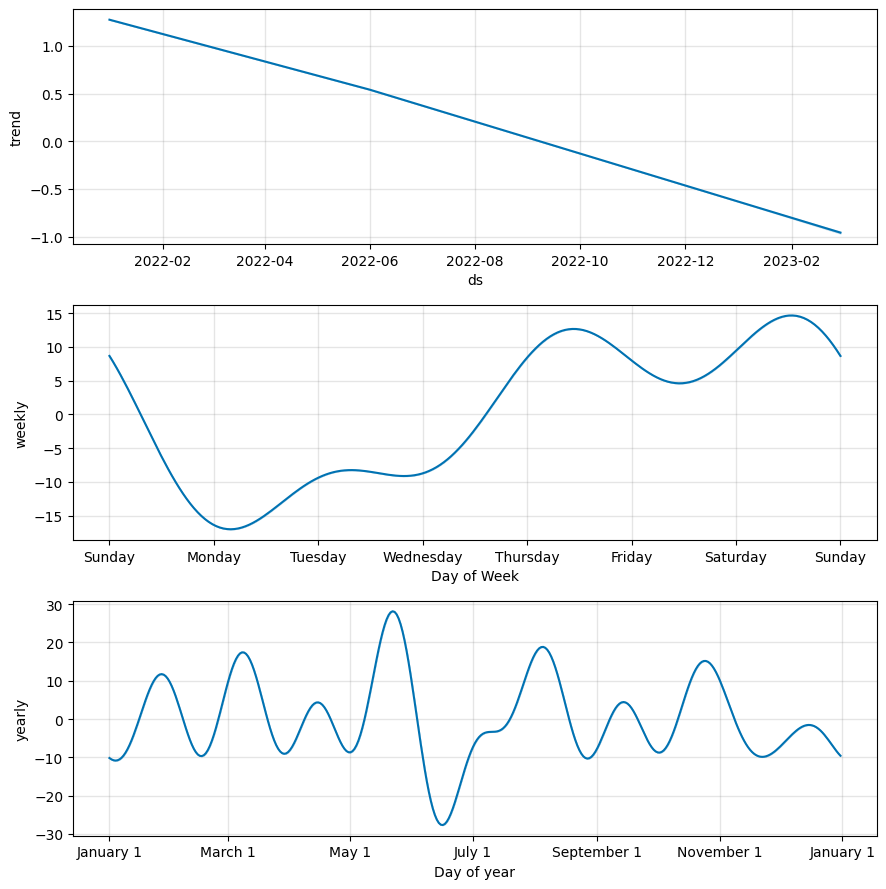

In [20]:
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
np.random.seed(42)

# สร้างข้อมูลรายรับรายจ่ายพร้อมความแปรปรวนตามฤดูกาล
revenues = []
expenses = []
categories = ['Staff', 'Utilities', 'Maintenance', 'Marketing', 'Food', 'Supplies']

for date in dates:
    # เพิ่มรายได้ช่วง high season (พ.ย.-ก.พ.) และวันหยุดสุดสัปดาห์
    season_factor = 1.5 if date.month in [11, 12, 1, 2] else 1.0
    weekend_factor = 1.3 if date.dayofweek >= 5 else 1.0
    base_revenue = 100000 * season_factor * weekend_factor
    
    # เพิ่มสุ่มเล็กน้อย
    revenue = base_revenue * (0.9 + 0.2 * np.random.random())
    revenues.append(revenue)
    
    # สร้างรายจ่ายปกติ + รายจ่ายผิดปกติในบางช่วง
    normal_expense = revenue * (0.6 + 0.1 * np.random.random())
    
    # เพิ่มรายจ่ายผิดปกติในบางเดือน
    if (date.month == 7 and date.day < 15) or (date.month == 3 and date.day > 20):
        normal_expense *= 1.4  # เพิ่มรายจ่ายผิดปกติ 40%
    
    expenses.append(normal_expense)

# สร้างข้อมูลรายจ่ายแยกตามหมวดหมู่
category_data = []
for i, date in enumerate(dates):
    total_expense = expenses[i]
    # แบ่งรายจ่ายตามหมวดหมู่
    if date.month in [11, 12, 1, 2]:  # High season
        weights = [0.4, 0.15, 0.1, 0.2, 0.1, 0.05]  # Staff, Utilities, Maintenance, Marketing, Food, Supplies
    else:
        weights = [0.35, 0.2, 0.15, 0.1, 0.15, 0.05]
    
    # สุ่มปรับเล็กน้อย
    weights = [w * (0.9 + 0.2 * np.random.random()) for w in weights]
    # ปรับให้รวมเป็น 1
    weights = [w / sum(weights) for w in weights]
    
    for j, category in enumerate(categories):
        category_expense = total_expense * weights[j]
        category_data.append({
            'date': date,
            'expense_category': category,
            'expense': category_expense,
            'year': date.year,
            'month': date.month
        })

# สร้าง DataFrame
sample_df = pd.DataFrame({
    'date': dates,
    'revenue': revenues,
    'expense': expenses
})

category_df = pd.DataFrame(category_data)

# วิเคราะห์ข้อมูล
sample_df = calculate_expense_ratio(sample_df)
monthly_data = analyze_expenses_by_time(sample_df)
monthly_data_with_anomalies = detect_anomalies(monthly_data)
forecast_data, components = forecast_with_prophet(monthly_data)
monthly_category_data = analyze_expenses_by_category(category_df)

# สร้างแดชบอร์ด
fig1, fig2, fig3, fig4 = create_expense_dashboard(
    monthly_data, 
    monthly_category_data,
    monthly_data_with_anomalies,
    forecast_data
)

# สร้างรายงานช่วงเวลาที่มีรายจ่ายผิดปกติ
report = generate_expense_report(monthly_data_with_anomalies, monthly_category_data)

# แสดงผลรายงาน
print("== ช่วงเวลาที่มีรายจ่ายสูงเกินไป ==")
for period in report:
    print(f"\nช่วงเวลา: {period['period']}")
    print(f"อัตราส่วนรายจ่ายต่อรายได้: {period['expense_ratio']:.2f}")
    print(f"รายจ่ายรวม: {period['total_expense']:,.2f} บาท")
    print(f"รายได้รวม: {period['total_revenue']:,.2f} บาท")
    print("หมวดหมู่รายจ่ายสูงสุด:")
    for i, category in enumerate(period['top_expense_categories']):
        print(f"  - {category}: {period['category_amounts'][i]:,.2f} บาท")

In [19]:
sample_df

,date,revenue,expense,expense_ratio,year,month,week,day_of_week
0,2022-01-01,190107.064635,132137.989391,0.695071,2022,1,52,5
1,2022-01-02,204047.763731,134644.150732,0.659866,2022,1,52,6
2,2022-01-03,139680.559213,85987.275711,0.615599,2022,1,1,0
3,2022-01-04,136742.508365,93889.814905,0.686618,2022,1,1,1
4,2022-01-05,153033.450352,102655.949179,0.670807,2022,1,1,2
...,...,...,...,...,...,...,...,...
360,2022-12-27,163150.213705,100846.949570,0.618123,2022,12,52,1
361,2022-12-28,136994.888021,92349.906849,0.674112,2022,12,52,2
362,2022-12-29,152234.193395,104156.028518,0.684183,2022,12,52,3
363,2022-12-30,139193.171299,94585.480696,0.679527,2022,12,52,4



Average monthly RevPAR in 2023:
           revpar_rounded
month                    
January       2536.778065
February      1753.214286
March         1829.600323
April         2584.128333
May           1719.923226
June          1830.866667
July          1022.880000
August        1088.081935
September     1785.414667
October       1850.438710
November      1758.161667
December      2584.221290

Average RevPAR by day of the week in 2023:
             revpar_rounded
day_of_week                
Monday          1730.172500
Tuesday         1722.977500
Wednesday       1738.868654
Thursday        1710.830962
Friday          1775.321154
Saturday        2150.877308
Sunday          2194.835283


/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/1623960638.py:187: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (monthly_data_2023['occupancy_rate_rounded'][i],
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/1623960638.py:188: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly_data_2023['revpar_rounded'][i]),



Monthly revenue forecast for 2023:
month
January      629120.75
February     392720.31
March        453740.86
April        620190.69
May          426540.82
June         439407.91
July         253674.37
August       269844.34
September    428499.43
October      458908.64
November     421958.94
December     640886.97
Name: total_revenue_rounded, dtype: float64

Total annual revenue forecast for 2023: 5,435,494.04 Baht

Revenue by season:
High season (Jan, Apr, Dec): 1,890,198.41 Baht (34.78%)
Low season (Jul, Aug): 523,518.71 Baht (9.63%)
Medium season (Other months): 3,021,776.92 Baht (55.59%)

Analysis results saved to hotel_metrics_seasonal_2023.csv


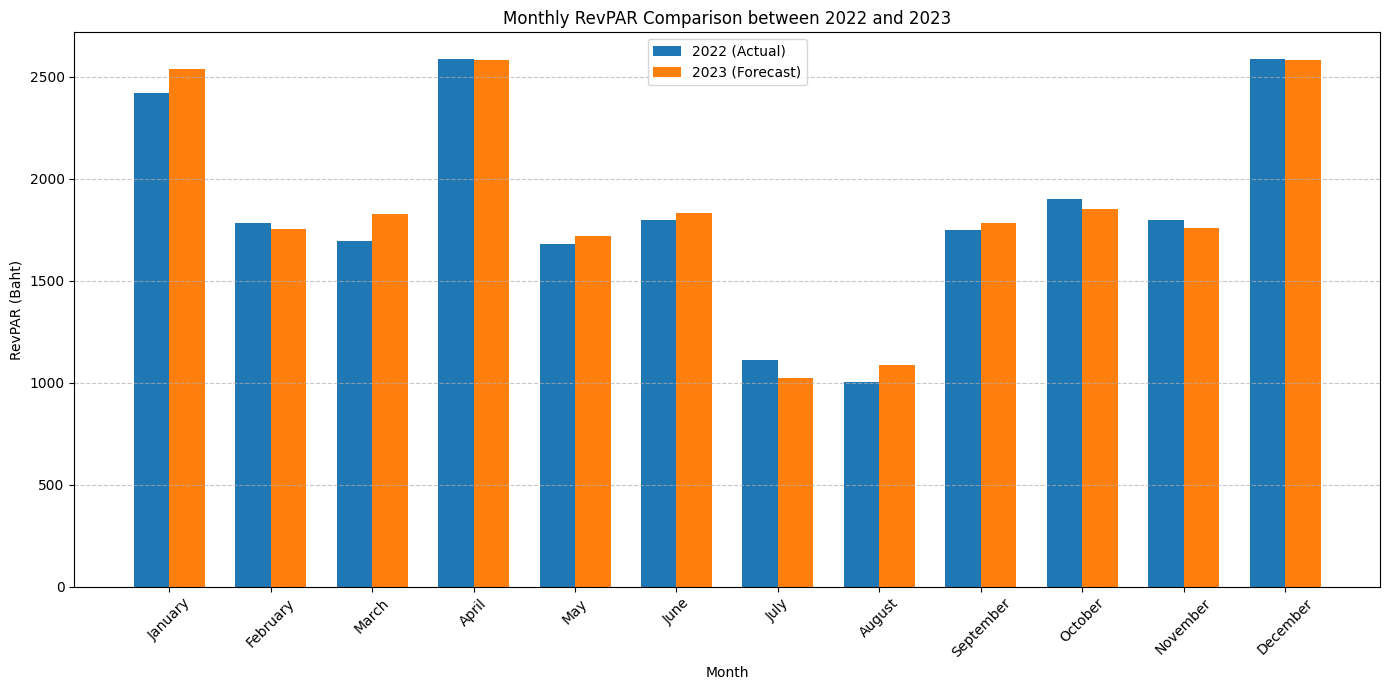

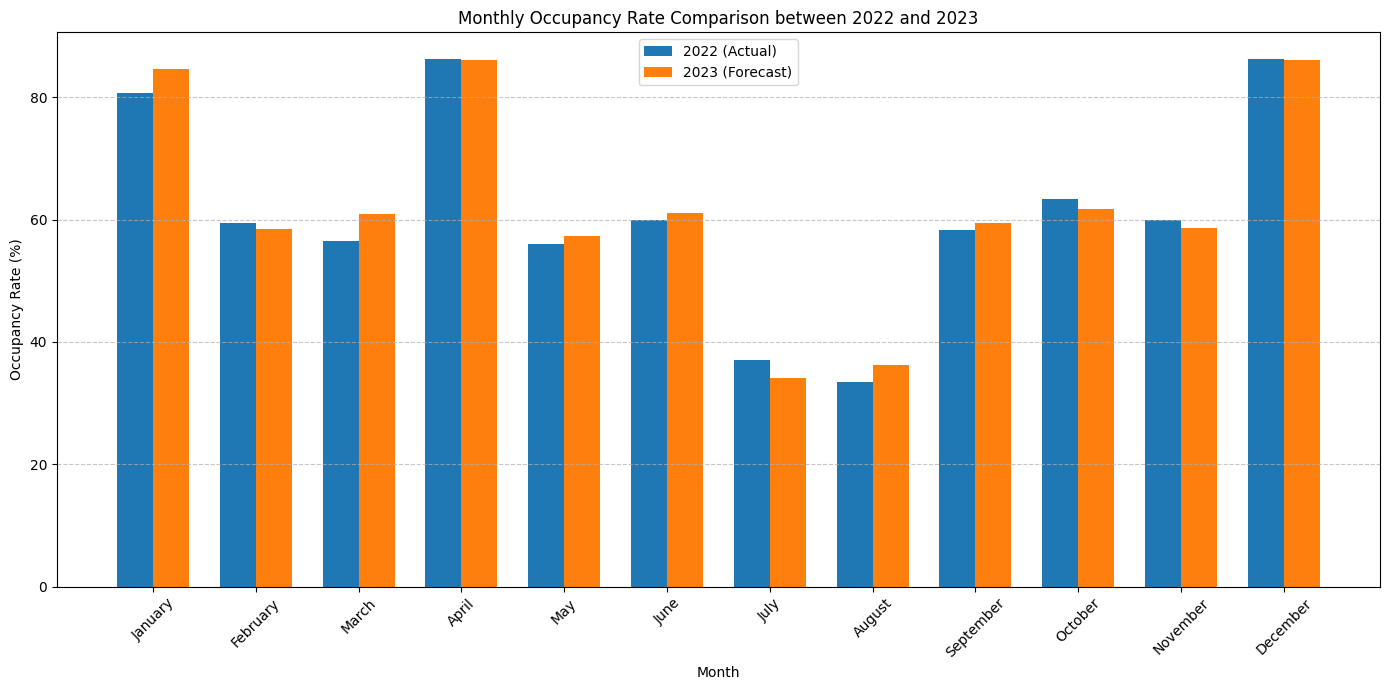

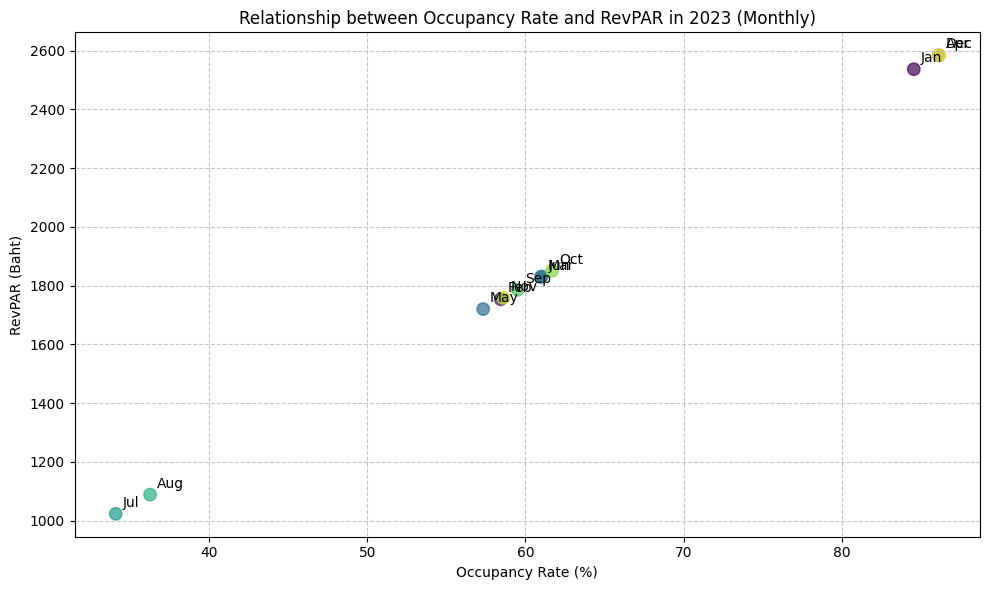

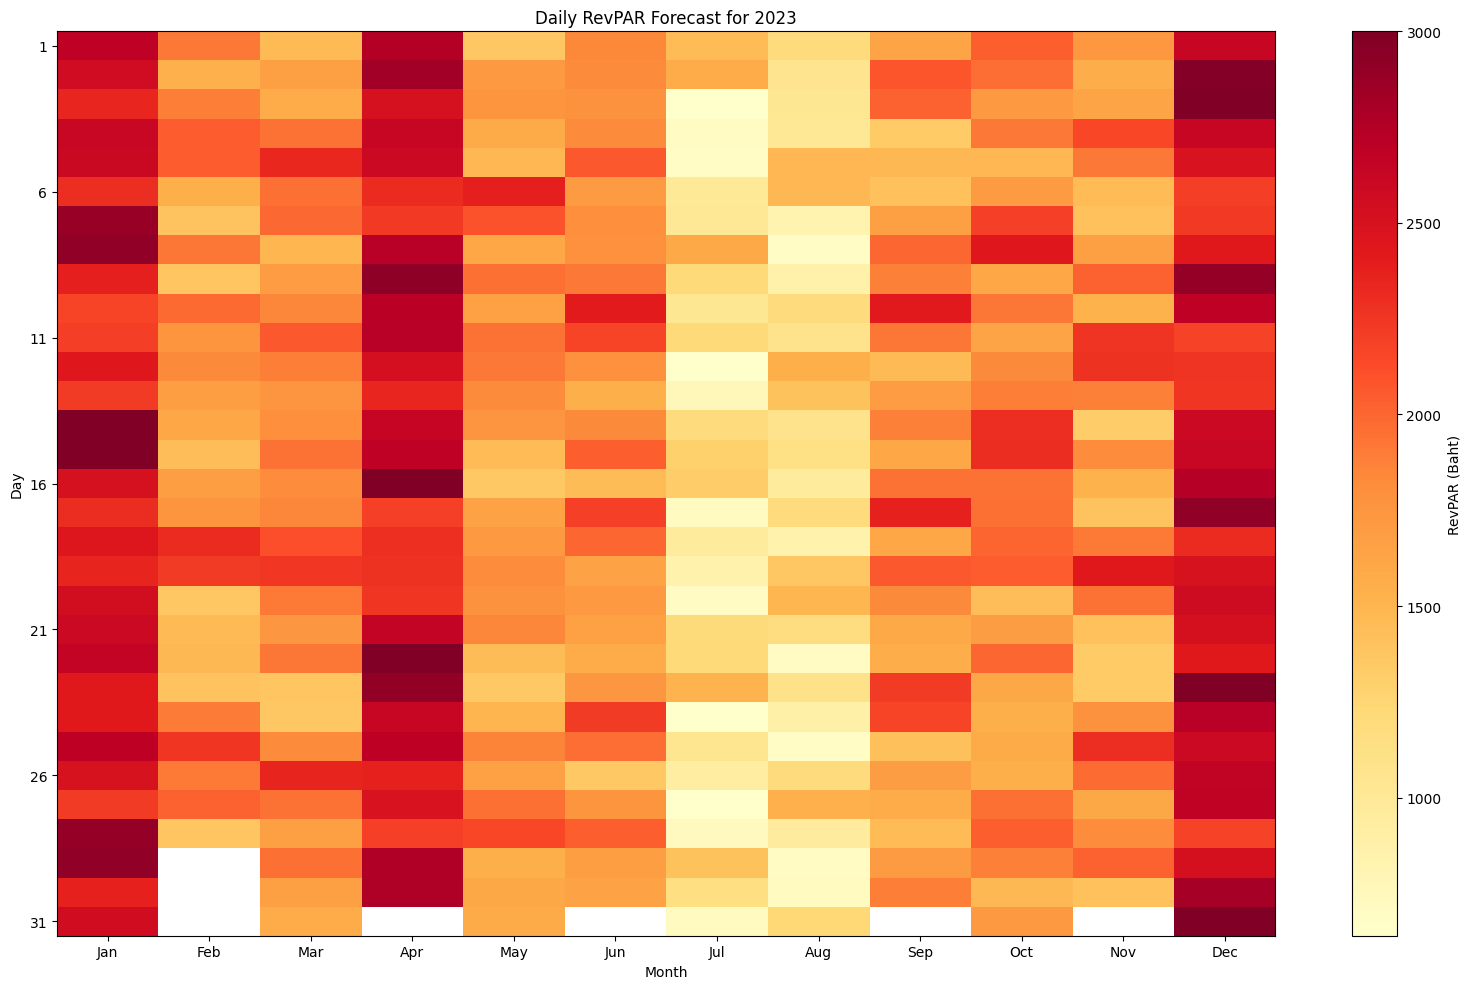

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import random

# Assume we have data loaded from CSV
# But we'll adjust the data to reflect the reality of tourism seasons

# Create sample data (if real data is not available)
# Create dates for 2022
def create_sample_data():
    start_date = pd.to_datetime('2022-01-01')
    end_date = pd.to_datetime('2022-12-31')
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Create basic DataFrame
    df = pd.DataFrame({'date': date_range})
    
    # Create room booking data considering seasonality
    bookings = []
    
    for date in date_range:
        month = date.month
        
        # High season: December (12), January (1), April (4)
        if month in [12, 1, 4]:
            # Random high bookings (5-8 rooms)
            booking = random.randint(5, 8)
        # Low season: July (7), August (8)
        elif month in [7, 8]:
            # Random low bookings (1-4 rooms)
            booking = random.randint(1, 4)
        # Medium season: other months
        else:
            # Random medium bookings (3-6 rooms)
            booking = random.randint(3, 6)
        
        # Add variation based on day of the week (weekends have more bookings)
        if date.dayofweek >= 5:  # Saturday(5) and Sunday(6)
            booking = min(booking + 1, 8)  # Increase bookings but not more than 8 rooms
            
        bookings.append(booking)
    
    df['booking'] = bookings
    
    # Calculate Occupancy Rate
    df['occupancy_rate'] = df['booking'] / 8 * 100
    
    return df

# Use simulated or real data
df = create_sample_data()

# Set room price
room_price = 3000  # baht

# 1. Calculate ADR and RevPAR for actual data
df['total_revenue'] = df['booking'] * room_price
df['adr'] = room_price  # ADR is constant because all rooms have the same price
df['revpar'] = df['total_revenue'] / 8  # RevPAR = total revenue / total number of rooms

# 2. Create predictions for 2023 (adding slight variations)
start_date_2023 = pd.to_datetime('2023-01-01')
end_date_2023 = pd.to_datetime('2023-12-31')
date_range_2023 = pd.date_range(start=start_date_2023, end=end_date_2023, freq='D')

forecast = pd.DataFrame({'ds': date_range_2023})
forecast['year'] = forecast['ds'].dt.year
forecast['month'] = forecast['ds'].dt.month_name()
forecast['month_num'] = forecast['ds'].dt.month
forecast['day_of_week'] = forecast['ds'].dt.day_name()

# Create predictions based on seasonal patterns
yhat_values = []

for date in date_range_2023:
    month = date.month
    
    # High season: December, January, April
    if month in [12, 1, 4]:
        # Random high bookings
        base_value = 6.5
        variation = random.uniform(-0.8, 0.8)
    # Low season: July, August 
    elif month in [7, 8]:
        # Random low bookings
        base_value = 2.5
        variation = random.uniform(-0.8, 0.8)
    # Medium season
    else:
        # Random medium bookings
        base_value = 4.5
        variation = random.uniform(-1.0, 1.0)
    
    # Add variation based on day of the week
    if date.dayofweek >= 5:  # Saturday, Sunday
        weekend_boost = 1.0
    else:
        weekend_boost = 0
        
    # Calculate value and adjust to appropriate range
    value = min(max(base_value + variation + weekend_boost, 0), 8)
    yhat_values.append(value)

forecast['yhat'] = yhat_values
forecast['yhat_rounded'] = np.round(forecast['yhat'], 2)
forecast['occupancy_rate'] = forecast['yhat'] / 8 * 100
forecast['occupancy_rate_rounded'] = np.round(forecast['occupancy_rate'], 2)

# 3. Calculate ADR and RevPAR for predictions
forecast['total_revenue'] = forecast['yhat'] * room_price
forecast['adr'] = room_price  # ADR is constant
forecast['revpar'] = forecast['total_revenue'] / 8
forecast['revpar_rounded'] = np.round(forecast['revpar'], 2)

# 4. Analyze average monthly RevPAR
print("\nAverage monthly RevPAR in 2023:")
monthly_revpar = forecast.groupby('month')[['revpar_rounded']].mean()
# Sort months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revpar = monthly_revpar.reindex(month_order)
print(monthly_revpar)

# 5. Analyze average RevPAR by day of the week
print("\nAverage RevPAR by day of the week in 2023:")
day_of_week_revpar = forecast.groupby('day_of_week')[['revpar_rounded']].mean()
# Sort days of the week correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_revpar = day_of_week_revpar.reindex(day_order)
print(day_of_week_revpar)

# Create monthly data for 2022
df['month'] = pd.to_datetime(df['date']).dt.month_name()
df['month_num'] = pd.to_datetime(df['date']).dt.month
monthly_data_2022 = df.groupby('month').agg({
    'booking': 'mean',
    'occupancy_rate': 'mean',
    'revpar': 'mean'
}).reindex(month_order)

# Create monthly data for 2023
monthly_data_2023 = forecast.groupby('month').agg({
    'yhat_rounded': 'mean',
    'occupancy_rate_rounded': 'mean',
    'revpar_rounded': 'mean'
}).reindex(month_order)

# 6. Create comparison chart of monthly RevPAR
plt.figure(figsize=(14, 7))
bar_width = 0.35
x = np.arange(len(month_order))

plt.bar(x - bar_width/2, monthly_data_2022['revpar'], bar_width, label='2022 (Actual)')
plt.bar(x + bar_width/2, monthly_data_2023['revpar_rounded'], bar_width, label='2023 (Forecast)')

plt.xlabel('Month')
plt.ylabel('RevPAR (Baht)')
plt.title('Monthly RevPAR Comparison between 2022 and 2023')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 7. Create comparison chart of monthly occupancy rates
plt.figure(figsize=(14, 7))
plt.bar(x - bar_width/2, monthly_data_2022['occupancy_rate'], bar_width, label='2022 (Actual)')
plt.bar(x + bar_width/2, monthly_data_2023['occupancy_rate_rounded'], bar_width, label='2023 (Forecast)')

plt.xlabel('Month')
plt.ylabel('Occupancy Rate (%)')
plt.title('Monthly Occupancy Rate Comparison between 2022 and 2023')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 8. Create chart showing the relationship between Occupancy Rate and RevPAR
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data_2023['occupancy_rate_rounded'], monthly_data_2023['revpar_rounded'], 
           s=80, alpha=0.7, c=range(12), cmap='viridis')

# Add month labels
for i, month in enumerate(month_order):
    plt.annotate(month[:3], 
                (monthly_data_2023['occupancy_rate_rounded'][i], 
                 monthly_data_2023['revpar_rounded'][i]),
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Occupancy Rate (%)')
plt.ylabel('RevPAR (Baht)')
plt.title('Relationship between Occupancy Rate and RevPAR in 2023 (Monthly)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 9. Create RevPAR heatmap by month
plt.figure(figsize=(16, 10))

# Create data for heatmap
pivot_data = forecast.copy()
pivot_data['day'] = pivot_data['ds'].dt.day

# Create daily table by month
heatmap_data = pivot_data.pivot_table(
    index='day', 
    columns='month_num', 
    values='revpar_rounded', 
    aggfunc='mean',
    fill_value=np.nan
)

# Use masked array technique to hide NaN values
mask = np.isnan(heatmap_data.values)
masked_data = np.ma.masked_array(heatmap_data.values, mask)

# Plot heatmap
plt.imshow(masked_data, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='RevPAR (Baht)')
plt.title('Daily RevPAR Forecast for 2023')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()

# 10. Calculate total monthly revenue
monthly_revenue = forecast.groupby('month')[['total_revenue']].sum().reindex(month_order)
monthly_revenue['total_revenue_rounded'] = np.round(monthly_revenue['total_revenue'], 2)
print("\nMonthly revenue forecast for 2023:")
print(monthly_revenue['total_revenue_rounded'])

# Calculate total annual revenue
annual_revenue = monthly_revenue['total_revenue'].sum()
print(f"\nTotal annual revenue forecast for 2023: {annual_revenue:,.2f} Baht")

# 11. Calculate revenue by season
high_season_months = ['January', 'April', 'December']
low_season_months = ['July', 'August']
mid_season_months = [m for m in month_order if m not in high_season_months and m not in low_season_months]

high_season_revenue = monthly_revenue.loc[high_season_months, 'total_revenue'].sum()
low_season_revenue = monthly_revenue.loc[low_season_months, 'total_revenue'].sum()
mid_season_revenue = monthly_revenue.loc[mid_season_months, 'total_revenue'].sum()

print("\nRevenue by season:")
print(f"High season (Jan, Apr, Dec): {high_season_revenue:,.2f} Baht ({high_season_revenue/annual_revenue*100:.2f}%)")
print(f"Low season (Jul, Aug): {low_season_revenue:,.2f} Baht ({low_season_revenue/annual_revenue*100:.2f}%)")
print(f"Medium season (Other months): {mid_season_revenue:,.2f} Baht ({mid_season_revenue/annual_revenue*100:.2f}%)")

# Save analysis results
result_df = forecast[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'revpar_rounded']]
result_df.columns = ['Date', 'Rooms Booked', 'Occupancy Rate (%)', 'RevPAR (Baht)']
result_df.to_csv('hotel_metrics_seasonal_2023.csv', index=False)

print("\nAnalysis results saved to hotel_metrics_seasonal_2023.csv")

plt.show()


Average monthly RevPAR in 2023:
           revpar_rounded
month                    
January       2533.370968
February      1812.046071
March         1870.137419
April         2528.143333
May           1768.800645
June          1783.909667
July          1080.675806
August         995.661935
September     1751.981333
October       1726.814516
November      1785.546333
December      2528.602258

Average RevPAR by day of the week in 2023:
             revpar_rounded
day_of_week                
Monday          1724.567885
Tuesday         1727.871923
Wednesday       1723.588077
Thursday        1716.292885
Friday          1758.339231
Saturday        2135.158654
Sunday          2131.851132


/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/1623960638.py:187: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (monthly_data_2023['occupancy_rate_rounded'][i],
/var/folders/t_/x6hdnsfd5sq7sg9rvkbfth5h0000gn/T/ipykernel_9527/1623960638.py:188: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly_data_2023['revpar_rounded'][i]),



Monthly revenue forecast for 2023:
month
January      628276.20
February     405898.48
March        463794.13
April        606754.34
May          438662.49
June         428138.05
July         268007.58
August       246924.02
September    420475.55
October      428250.12
November     428531.25
December     627093.35
Name: total_revenue_rounded, dtype: float64

Total annual revenue forecast for 2023: 5,390,805.56 Baht

Revenue by season:
High season (Jan, Apr, Dec): 1,862,123.89 Baht (34.54%)
Low season (Jul, Aug): 514,931.60 Baht (9.55%)
Medium season (Other months): 3,013,750.07 Baht (55.91%)

Analysis results saved to hotel_metrics_seasonal_2023.csv


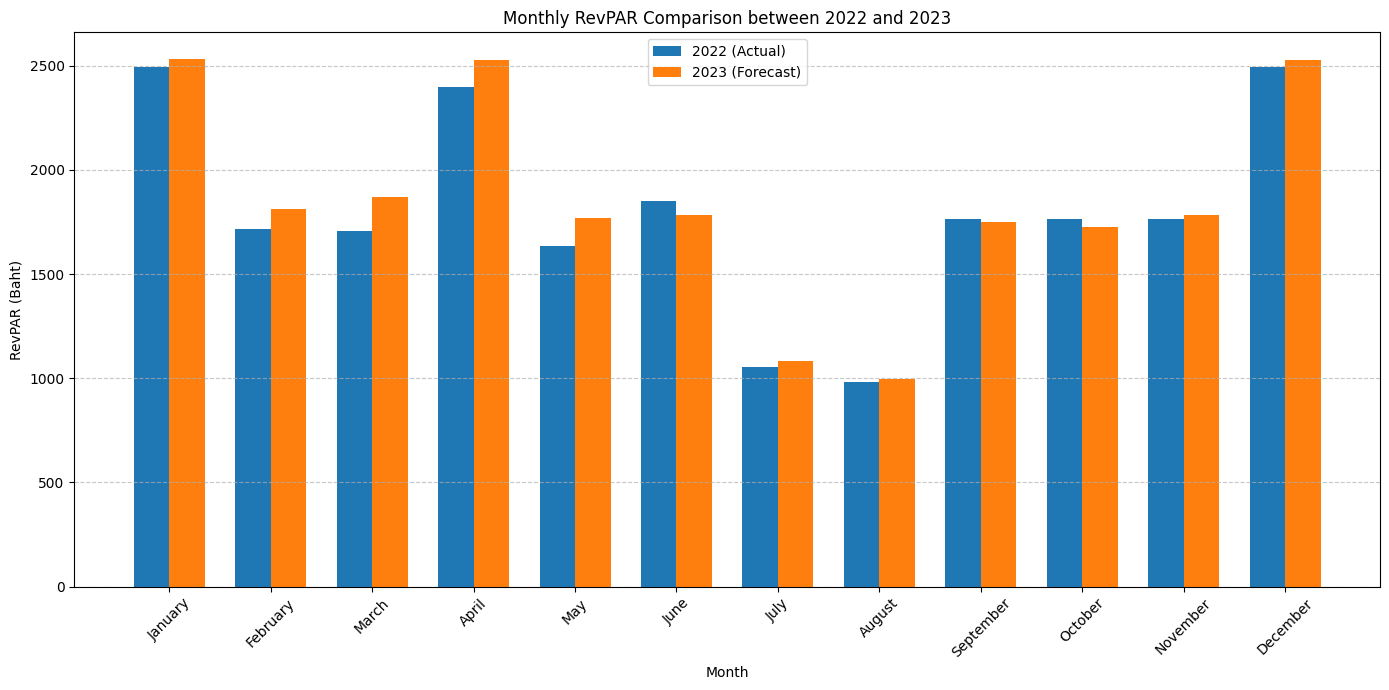

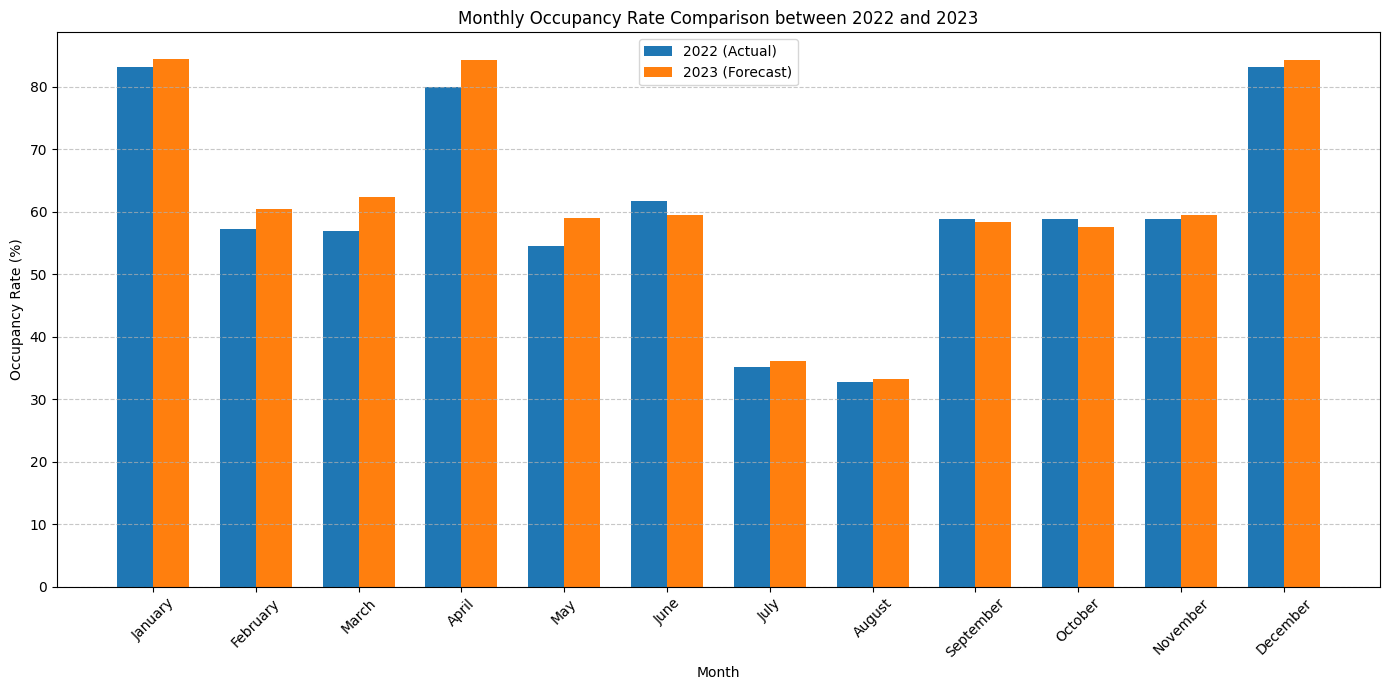

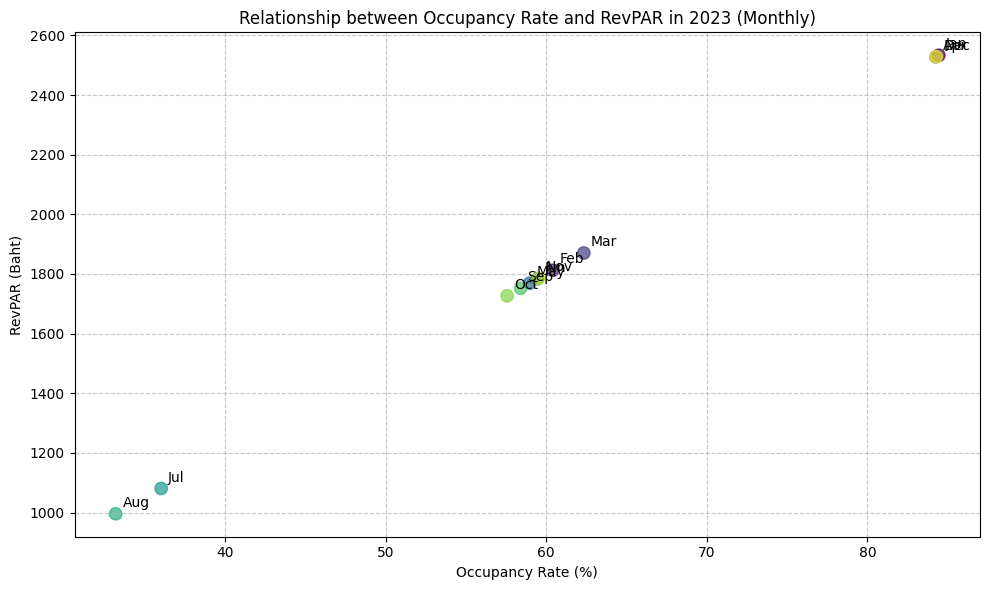

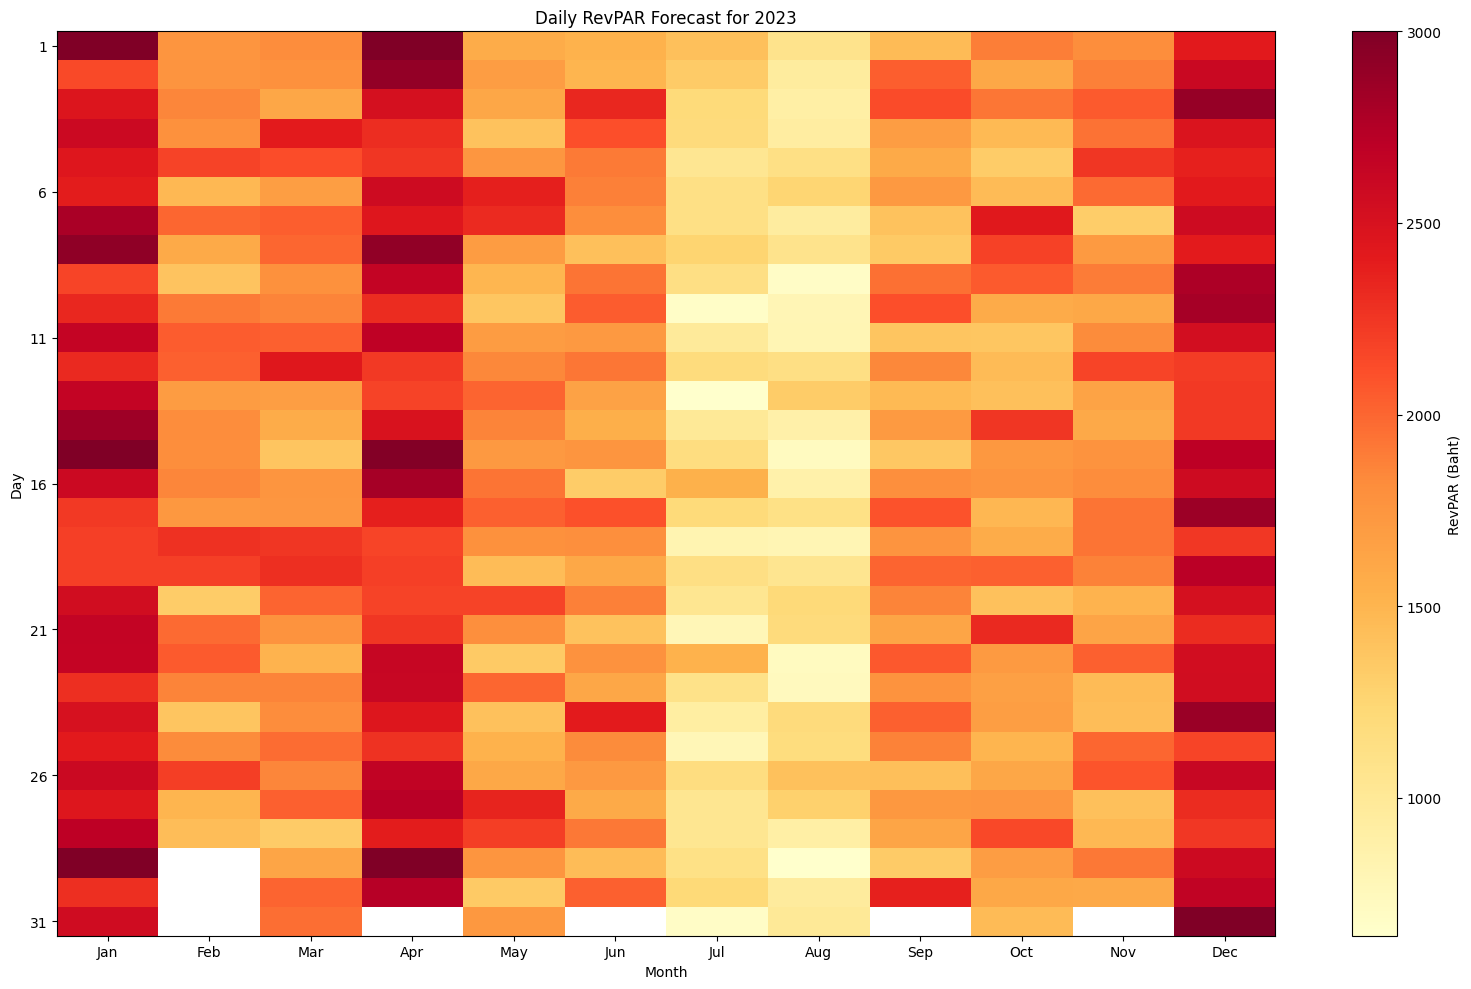

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import random

# Assume we have data loaded from CSV
# But we'll adjust the data to reflect the reality of tourism seasons

# Create sample data (if real data is not available)
# Create dates for 2022
def create_sample_data():
    start_date = pd.to_datetime('2022-01-01')
    end_date = pd.to_datetime('2022-12-31')
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Create basic DataFrame
    df = pd.DataFrame({'date': date_range})
    
    # Create room booking data considering seasonality
    bookings = []
    
    for date in date_range:
        month = date.month
        
        # High season: December (12), January (1), April (4)
        if month in [12, 1, 4]:
            # Random high bookings (5-8 rooms)
            booking = random.randint(5, 8)
        # Low season: July (7), August (8)
        elif month in [7, 8]:
            # Random low bookings (1-4 rooms)
            booking = random.randint(1, 4)
        # Medium season: other months
        else:
            # Random medium bookings (3-6 rooms)
            booking = random.randint(3, 6)
        
        # Add variation based on day of the week (weekends have more bookings)
        if date.dayofweek >= 5:  # Saturday(5) and Sunday(6)
            booking = min(booking + 1, 8)  # Increase bookings but not more than 8 rooms
            
        bookings.append(booking)
    
    df['booking'] = bookings
    
    # Calculate Occupancy Rate
    df['occupancy_rate'] = df['booking'] / 8 * 100
    
    return df

# Use simulated or real data
df = create_sample_data()

# Set room price
room_price = 3000  # baht

# 1. Calculate ADR and RevPAR for actual data
df['total_revenue'] = df['booking'] * room_price
df['adr'] = room_price  # ADR is constant because all rooms have the same price
df['revpar'] = df['total_revenue'] / 8  # RevPAR = total revenue / total number of rooms

# 2. Create predictions for 2023 (adding slight variations)
start_date_2023 = pd.to_datetime('2023-01-01')
end_date_2023 = pd.to_datetime('2023-12-31')
date_range_2023 = pd.date_range(start=start_date_2023, end=end_date_2023, freq='D')

forecast = pd.DataFrame({'ds': date_range_2023})
forecast['year'] = forecast['ds'].dt.year
forecast['month'] = forecast['ds'].dt.month_name()
forecast['month_num'] = forecast['ds'].dt.month
forecast['day_of_week'] = forecast['ds'].dt.day_name()

# Create predictions based on seasonal patterns
yhat_values = []

for date in date_range_2023:
    month = date.month
    
    # High season: December, January, April
    if month in [12, 1, 4]:
        # Random high bookings
        base_value = 6.5
        variation = random.uniform(-0.8, 0.8)
    # Low season: July, August 
    elif month in [7, 8]:
        # Random low bookings
        base_value = 2.5
        variation = random.uniform(-0.8, 0.8)
    # Medium season
    else:
        # Random medium bookings
        base_value = 4.5
        variation = random.uniform(-1.0, 1.0)
    
    # Add variation based on day of the week
    if date.dayofweek >= 5:  # Saturday, Sunday
        weekend_boost = 1.0
    else:
        weekend_boost = 0
        
    # Calculate value and adjust to appropriate range
    value = min(max(base_value + variation + weekend_boost, 0), 8)
    yhat_values.append(value)

forecast['yhat'] = yhat_values
forecast['yhat_rounded'] = np.round(forecast['yhat'], 2)
forecast['occupancy_rate'] = forecast['yhat'] / 8 * 100
forecast['occupancy_rate_rounded'] = np.round(forecast['occupancy_rate'], 2)

# 3. Calculate ADR and RevPAR for predictions
forecast['total_revenue'] = forecast['yhat'] * room_price
forecast['adr'] = room_price  # ADR is constant
forecast['revpar'] = forecast['total_revenue'] / 8
forecast['revpar_rounded'] = np.round(forecast['revpar'], 2)

# 4. Analyze average monthly RevPAR
print("\nAverage monthly RevPAR in 2023:")
monthly_revpar = forecast.groupby('month')[['revpar_rounded']].mean()
# Sort months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revpar = monthly_revpar.reindex(month_order)
print(monthly_revpar)

# 5. Analyze average RevPAR by day of the week
print("\nAverage RevPAR by day of the week in 2023:")
day_of_week_revpar = forecast.groupby('day_of_week')[['revpar_rounded']].mean()
# Sort days of the week correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_revpar = day_of_week_revpar.reindex(day_order)
print(day_of_week_revpar)

# Create monthly data for 2022
df['month'] = pd.to_datetime(df['date']).dt.month_name()
df['month_num'] = pd.to_datetime(df['date']).dt.month
monthly_data_2022 = df.groupby('month').agg({
    'booking': 'mean',
    'occupancy_rate': 'mean',
    'revpar': 'mean'
}).reindex(month_order)

# Create monthly data for 2023
monthly_data_2023 = forecast.groupby('month').agg({
    'yhat_rounded': 'mean',
    'occupancy_rate_rounded': 'mean',
    'revpar_rounded': 'mean'
}).reindex(month_order)

# 6. Create comparison chart of monthly RevPAR
plt.figure(figsize=(14, 7))
bar_width = 0.35
x = np.arange(len(month_order))

plt.bar(x - bar_width/2, monthly_data_2022['revpar'], bar_width, label='2022 (Actual)')
plt.bar(x + bar_width/2, monthly_data_2023['revpar_rounded'], bar_width, label='2023 (Forecast)')

plt.xlabel('Month')
plt.ylabel('RevPAR (Baht)')
plt.title('Monthly RevPAR Comparison between 2022 and 2023')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 7. Create comparison chart of monthly occupancy rates
plt.figure(figsize=(14, 7))
plt.bar(x - bar_width/2, monthly_data_2022['occupancy_rate'], bar_width, label='2022 (Actual)')
plt.bar(x + bar_width/2, monthly_data_2023['occupancy_rate_rounded'], bar_width, label='2023 (Forecast)')

plt.xlabel('Month')
plt.ylabel('Occupancy Rate (%)')
plt.title('Monthly Occupancy Rate Comparison between 2022 and 2023')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 8. Create chart showing the relationship between Occupancy Rate and RevPAR
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data_2023['occupancy_rate_rounded'], monthly_data_2023['revpar_rounded'], 
           s=80, alpha=0.7, c=range(12), cmap='viridis')

# Add month labels
for i, month in enumerate(month_order):
    plt.annotate(month[:3], 
                (monthly_data_2023['occupancy_rate_rounded'][i], 
                 monthly_data_2023['revpar_rounded'][i]),
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Occupancy Rate (%)')
plt.ylabel('RevPAR (Baht)')
plt.title('Relationship between Occupancy Rate and RevPAR in 2023 (Monthly)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 9. Create RevPAR heatmap by month
plt.figure(figsize=(16, 10))

# Create data for heatmap
pivot_data = forecast.copy()
pivot_data['day'] = pivot_data['ds'].dt.day

# Create daily table by month
heatmap_data = pivot_data.pivot_table(
    index='day', 
    columns='month_num', 
    values='revpar_rounded', 
    aggfunc='mean',
    fill_value=np.nan
)

# Use masked array technique to hide NaN values
mask = np.isnan(heatmap_data.values)
masked_data = np.ma.masked_array(heatmap_data.values, mask)

# Plot heatmap
plt.imshow(masked_data, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='RevPAR (Baht)')
plt.title('Daily RevPAR Forecast for 2023')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(0, 31, 5), np.arange(1, 32, 5))
plt.tight_layout()

# 10. Calculate total monthly revenue
monthly_revenue = forecast.groupby('month')[['total_revenue']].sum().reindex(month_order)
monthly_revenue['total_revenue_rounded'] = np.round(monthly_revenue['total_revenue'], 2)
print("\nMonthly revenue forecast for 2023:")
print(monthly_revenue['total_revenue_rounded'])

# Calculate total annual revenue
annual_revenue = monthly_revenue['total_revenue'].sum()
print(f"\nTotal annual revenue forecast for 2023: {annual_revenue:,.2f} Baht")

# 11. Calculate revenue by season
high_season_months = ['January', 'April', 'December']
low_season_months = ['July', 'August']
mid_season_months = [m for m in month_order if m not in high_season_months and m not in low_season_months]

high_season_revenue = monthly_revenue.loc[high_season_months, 'total_revenue'].sum()
low_season_revenue = monthly_revenue.loc[low_season_months, 'total_revenue'].sum()
mid_season_revenue = monthly_revenue.loc[mid_season_months, 'total_revenue'].sum()

print("\nRevenue by season:")
print(f"High season (Jan, Apr, Dec): {high_season_revenue:,.2f} Baht ({high_season_revenue/annual_revenue*100:.2f}%)")
print(f"Low season (Jul, Aug): {low_season_revenue:,.2f} Baht ({low_season_revenue/annual_revenue*100:.2f}%)")
print(f"Medium season (Other months): {mid_season_revenue:,.2f} Baht ({mid_season_revenue/annual_revenue*100:.2f}%)")

# Save analysis results
result_df = forecast[['ds', 'yhat_rounded', 'occupancy_rate_rounded', 'revpar_rounded']]
result_df.columns = ['Date', 'Rooms Booked', 'Occupancy Rate (%)', 'RevPAR (Baht)']
result_df.to_csv('hotel_metrics_seasonal_2023.csv', index=False)

print("\nAnalysis results saved to hotel_metrics_seasonal_2023.csv")

plt.show()

1. Running standard Prophet optimization...
Testing parameter set 1/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.06it/s]


Testing parameter set 2/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 25.34it/s]


Testing parameter set 3/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.38it/s]


Testing parameter set 4/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.41it/s]


Testing parameter set 5/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.91it/s]


Testing parameter set 6/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.79it/s]


Testing parameter set 7/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.20it/s]


Testing parameter set 8/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 25.90it/s]


Testing parameter set 9/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 20.81it/s]


Testing parameter set 10/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 29.04it/s]


Testing parameter set 11/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.96it/s]


Testing parameter set 12/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.45it/s]


Testing parameter set 13/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.23it/s]


Testing parameter set 14/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.55it/s]


Testing parameter set 15/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.69it/s]


Testing parameter set 16/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.81it/s]


Testing parameter set 17/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.31it/s]


Testing parameter set 18/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.77it/s]


Testing parameter set 19/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.52it/s]


Testing parameter set 20/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.09it/s]


Testing parameter set 21/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.55it/s]


Testing parameter set 22/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.37it/s]


Testing parameter set 23/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.88it/s]


Testing parameter set 24/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.69it/s]


Testing parameter set 25/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.68it/s]


Testing parameter set 26/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.67it/s]


Testing parameter set 27/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.66it/s]


Testing parameter set 28/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.64it/s]


Testing parameter set 29/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 25.56it/s]


Testing parameter set 30/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.28it/s]


Testing parameter set 31/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.58it/s]


Testing parameter set 32/160: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.28it/s]


Testing parameter set 33/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.28it/s]


Testing parameter set 34/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.03it/s]


Testing parameter set 35/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.43it/s]


Testing parameter set 36/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.67it/s]


Testing parameter set 37/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.46it/s]


Testing parameter set 38/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.42it/s]


Testing parameter set 39/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.90it/s]


Testing parameter set 40/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 26.11it/s]


Testing parameter set 41/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.59it/s]


Testing parameter set 42/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.41it/s]


Testing parameter set 43/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.87it/s]


Testing parameter set 44/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.59it/s]


Testing parameter set 45/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.31it/s]


Testing parameter set 46/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.49it/s]


Testing parameter set 47/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.59it/s]


Testing parameter set 48/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.82it/s]


Testing parameter set 49/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.72it/s]


Testing parameter set 50/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.63it/s]


Testing parameter set 51/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 25.14it/s]


Testing parameter set 52/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 26.84it/s]


Testing parameter set 53/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.47it/s]


Testing parameter set 54/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.82it/s]


Testing parameter set 55/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.39it/s]


Testing parameter set 56/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.89it/s]


Testing parameter set 57/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.61it/s]


Testing parameter set 58/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.29it/s]


Testing parameter set 59/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.71it/s]


Testing parameter set 60/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.60it/s]


Testing parameter set 61/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.56it/s]


Testing parameter set 62/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 26.37it/s]


Testing parameter set 63/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.59it/s]


Testing parameter set 64/160: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.63it/s]


Testing parameter set 65/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.64it/s]


Testing parameter set 66/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.70it/s]


Testing parameter set 67/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.83it/s]


Testing parameter set 68/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.33it/s]


Testing parameter set 69/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.62it/s]


Testing parameter set 70/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.71it/s]


Testing parameter set 71/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.79it/s]


Testing parameter set 72/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.39it/s]


Testing parameter set 73/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 26.31it/s]


Testing parameter set 74/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.07it/s]


Testing parameter set 75/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.73it/s]


Testing parameter set 76/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.78it/s]


Testing parameter set 77/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.38it/s]


Testing parameter set 78/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.62it/s]


Testing parameter set 79/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.15it/s]


Testing parameter set 80/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.63it/s]


Testing parameter set 81/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.76it/s]


Testing parameter set 82/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.73it/s]


Testing parameter set 83/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.42it/s]


Testing parameter set 84/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 25.95it/s]


Testing parameter set 85/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.01it/s]


Testing parameter set 86/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.37it/s]


Testing parameter set 87/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.09it/s]


Testing parameter set 88/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.37it/s]


Testing parameter set 89/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.39it/s]


Testing parameter set 90/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.76it/s]


Testing parameter set 91/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.54it/s]


Testing parameter set 92/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.95it/s]


Testing parameter set 93/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 26.09it/s]


Testing parameter set 94/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.38it/s]


Testing parameter set 95/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.82it/s]


Testing parameter set 96/160: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.94it/s]


Testing parameter set 97/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.79it/s]


Testing parameter set 98/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.34it/s]


Testing parameter set 99/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.25it/s]


Testing parameter set 100/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.38it/s]


Testing parameter set 101/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.48it/s]


Testing parameter set 102/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.60it/s]


Testing parameter set 103/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 26.20it/s]


Testing parameter set 104/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.69it/s]


Testing parameter set 105/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.27it/s]


Testing parameter set 106/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.55it/s]


Testing parameter set 107/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.69it/s]


Testing parameter set 108/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.74it/s]


Testing parameter set 109/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.06it/s]


Testing parameter set 110/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.61it/s]


Testing parameter set 111/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.82it/s]


Testing parameter set 112/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.47it/s]


Testing parameter set 113/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 26.20it/s]


Testing parameter set 114/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.61it/s]


Testing parameter set 115/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.55it/s]


Testing parameter set 116/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.14it/s]


Testing parameter set 117/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.73it/s]


Testing parameter set 118/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.04it/s]


Testing parameter set 119/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.38it/s]


Testing parameter set 120/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.49it/s]


Testing parameter set 121/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.45it/s]


Testing parameter set 122/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.21it/s]


Testing parameter set 123/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.50it/s]


Testing parameter set 124/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 25.97it/s]


Testing parameter set 125/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.65it/s]


Testing parameter set 126/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.14it/s]


Testing parameter set 127/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.64it/s]


Testing parameter set 128/160: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.56it/s]


Testing parameter set 129/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.54it/s]


Testing parameter set 130/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.63it/s]


Testing parameter set 131/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.42it/s]


Testing parameter set 132/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.47it/s]


Testing parameter set 133/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.34it/s]


Testing parameter set 134/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 25.93it/s]


Testing parameter set 135/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.52it/s]


Testing parameter set 136/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.26it/s]


Testing parameter set 137/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.60it/s]


Testing parameter set 138/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 27.77it/s]


Testing parameter set 139/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.83it/s]


Testing parameter set 140/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.46it/s]


Testing parameter set 141/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.69it/s]


Testing parameter set 142/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.08it/s]


Testing parameter set 143/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.36it/s]


Testing parameter set 144/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 26.38it/s]


Testing parameter set 145/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.46it/s]


Testing parameter set 146/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.55it/s]


Testing parameter set 147/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.31it/s]


Testing parameter set 148/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.56it/s]


Testing parameter set 149/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 27.61it/s]


Testing parameter set 150/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.50it/s]


Testing parameter set 151/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.52it/s]


Testing parameter set 152/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.65it/s]


Testing parameter set 153/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.60it/s]


Testing parameter set 154/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.39it/s]


Testing parameter set 155/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 26.23it/s]


Testing parameter set 156/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.16it/s]


Testing parameter set 157/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.44it/s]


Testing parameter set 158/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.40it/s]


Testing parameter set 159/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive'}


100%|██████████| 10/10 [00:00<00:00, 28.44it/s]


Testing parameter set 160/160: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'multiplicative'}


100%|██████████| 10/10 [00:00<00:00, 28.22it/s]


Best parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_mode': 'additive'}, MAPE: nan
MAPE: 28.96%
MAE: 0.08
RMSE: 0.20


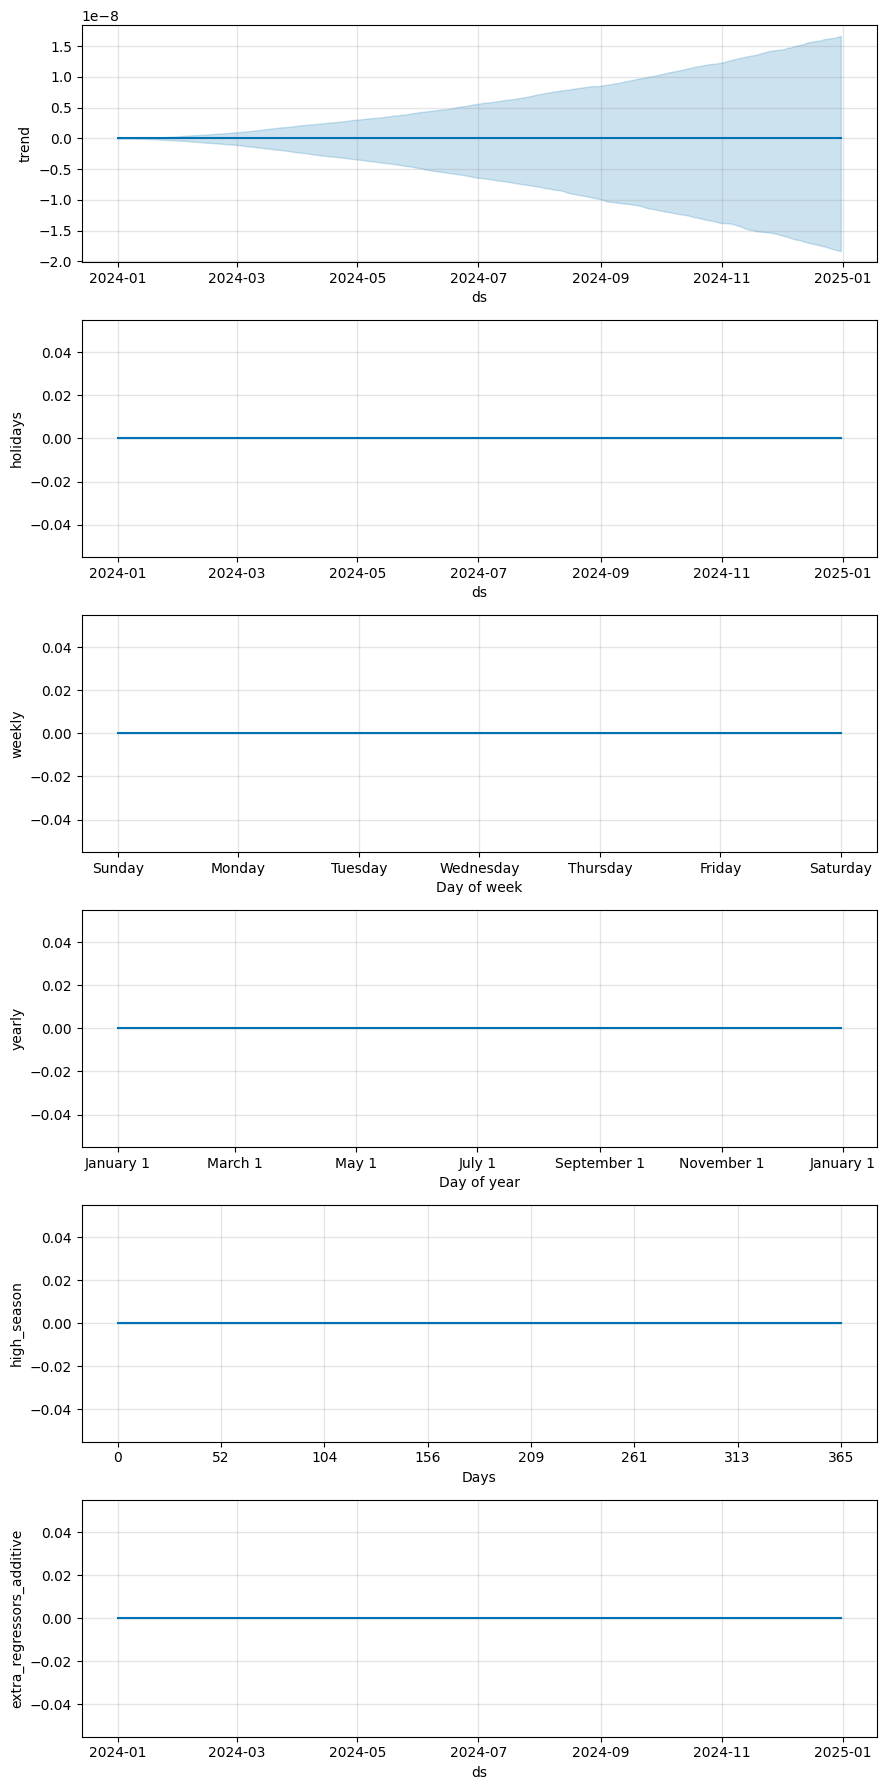

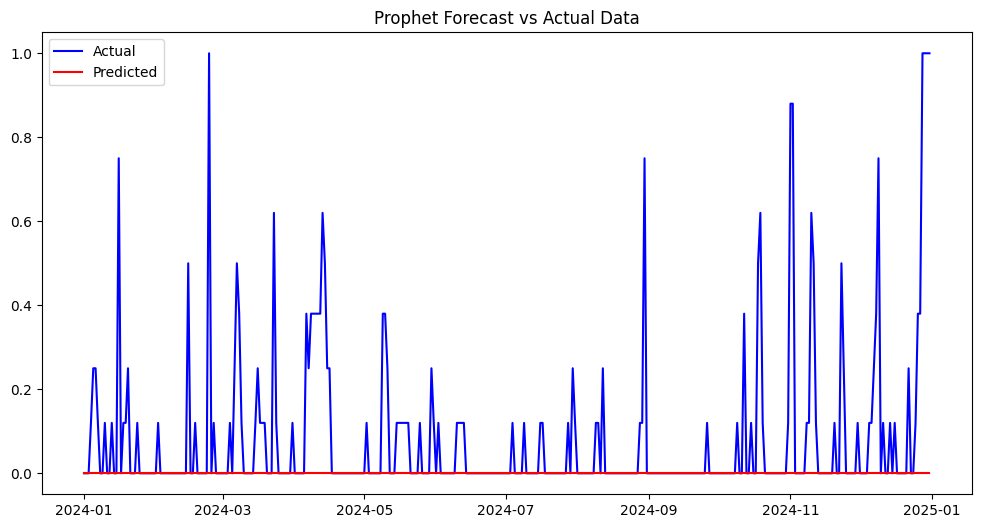

MAPE is 28.96174863387978%, still too high. Trying seasonal models...
Trying log transformation...


In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# อ่านข้อมูล
train_df = pd.read_csv('2022-2024_booking.csv')
test_df = pd.read_csv('test_data_2024.csv')

# เตรียมข้อมูล
train_df.drop('booking', axis=1, inplace=True)
test_df.drop('booking', axis=1, inplace=True)
train_df = train_df.drop_duplicates(subset=['ds'])
test_df = test_df.drop_duplicates(subset=['ds'])
train_df['ds'] = pd.to_datetime(train_df['ds'], format='%d/%m/%Y')
test_df['ds'] = pd.to_datetime(test_df['ds'], format='%d/%m/%Y')

# จัดการกับ outliers
def handle_outliers(df):
    Q1 = df['y'].quantile(0.25)
    Q3 = df['y'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # สร้าง copy เพื่อไม่เปลี่ยนแปลงข้อมูลต้นฉบับ
    filtered_df = df.copy()
    # แทนที่ค่า outliers ด้วยค่าขอบเขต
    filtered_df.loc[filtered_df['y'] < lower_bound, 'y'] = lower_bound
    filtered_df.loc[filtered_df['y'] > upper_bound, 'y'] = upper_bound
    return filtered_df

# เพิ่ม feature วันหยุด
def create_holiday_features(df):
    df_copy = df.copy()
    
    # เพิ่ม feature สำหรับช่วง high season (พ.ย.-ก.พ.)
    df_copy['is_high_season'] = ((df_copy['ds'].dt.month >= 11) | 
                               (df_copy['ds'].dt.month <= 2)).astype(int)
    
    # เพิ่ม feature สำหรับวันหยุดสุดสัปดาห์
    df_copy['is_weekend'] = df_copy['ds'].dt.dayofweek.isin([5, 6]).astype(int)
    
    return df_copy

# สร้างข้อมูลวันหยุด
def create_holiday_dataframe():
    # วันหยุดราชการและเทศกาลสำคัญ
    holidays = pd.DataFrame({
    'holiday': [
        # ปีใหม่และสงกรานต์ 2022-2024
        'New Year', 'New Year', 'New Year',
        'Songkran', 'Songkran', 'Songkran',
        'New Year', 'New Year', 'New Year',
        'Songkran', 'Songkran', 'Songkran',
        'New Year', 'New Year', 'New Year',
        'Songkran', 'Songkran', 'Songkran',
        
        # วันหยุดอื่นๆ 2022
        'Labor Day', 'Coronation Day', 'Visakha Bucha', 'Queen Birthday', 
        'King Birthday', 'Mother Day', 'Chulalongkorn Day', 'Father Day', 
        'Constitution Day', 'Loy Krathong',
        
        # วันหยุดอื่นๆ 2023
        'Labor Day', 'Coronation Day', 'Visakha Bucha', 'Queen Birthday', 
        'King Birthday', 'Mother Day', 'Chulalongkorn Day', 'Father Day', 
        'Constitution Day', 'Loy Krathong',
        
        # วันหยุดอื่นๆ 2024
        'Labor Day', 'Coronation Day', 'Visakha Bucha', 'Queen Birthday', 
        'King Birthday', 'Mother Day', 'Chulalongkorn Day', 'Father Day', 
        'Constitution Day', 'Loy Krathong'
    ],
    'ds': pd.to_datetime([
        # ปีใหม่และสงกรานต์ 2022-2024
        '2022-12-30', '2022-12-31', '2023-01-01',
        '2022-04-13', '2022-04-14', '2022-04-15',
        '2023-12-30', '2023-12-31', '2024-01-01',
        '2023-04-13', '2023-04-14', '2023-04-15',
        '2024-12-30', '2024-12-31', '2025-01-01',
        '2024-04-13', '2024-04-14', '2024-04-15',
        
        # วันหยุดอื่นๆ 2022
        '2022-05-01', '2022-05-04', '2022-05-16', '2022-06-03',
        '2022-07-28', '2022-08-12', '2022-10-23', '2022-12-05',
        '2022-12-10', '2022-11-08',
        
        # วันหยุดอื่นๆ 2023
        '2023-05-01', '2023-05-04', '2023-06-03', '2023-06-03',
        '2023-07-28', '2023-08-12', '2023-10-23', '2023-12-05',
        '2023-12-10', '2023-11-27',
        
        # วันหยุดอื่นๆ 2024
        '2024-05-01', '2024-05-04', '2024-05-22', '2024-06-03',
        '2024-07-28', '2024-08-12', '2024-10-23', '2024-12-05',
        '2024-12-10', '2024-11-15'
    ]),
    'lower_window': 0,
    'upper_window': 1  # คลุม 1 วันหลังวันหยุดด้วย เพื่อรองรับผลกระทบต่อเนื่อง
    })
    
    return holidays

# ฟังก์ชันสำหรับ hyperparameter tuning
# แก้ไขในฟังก์ชัน find_best_parameters
def find_best_parameters(train_data, holidays):
    # กำหนดพารามิเตอร์ที่ต้องการ tune
    param_grid = {  
        'changepoint_prior_scale': [0.001, 0.01, 0.05, 0.1, 0.5],
        'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
        'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
        'seasonality_mode': ['additive', 'multiplicative']
    }
    
    # สร้างทุก combinations ของพารามิเตอร์
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    mapes = []  # เก็บค่า MAPE
    params = []  # เก็บพารามิเตอร์
    
    # ทดสอบแต่ละชุดพารามิเตอร์
    for i, params_dict in enumerate(all_params):
        print(f"Testing parameter set {i+1}/{len(all_params)}: {params_dict}")
        m = Prophet(
            holidays=holidays,
            **params_dict
        )
        
        # เพิ่ม custom seasonality
        m.add_seasonality(name='high_season', period=365, fourier_order=5, 
                         condition_name='is_high_season')
        m.add_seasonality(name='weekly', period=7, fourier_order=3)
        
        m.fit(train_data)
        
        # ใช้ cross validation เพื่อประเมินผล
        df_cv = cross_validation(m, initial='365 days', period='30 days', horizon='90 days')
        df_p = performance_metrics(df_cv)
        
        # แก้ไขตรงนี้: ตรวจสอบว่ามีคอลัมน์ 'mape' หรือ 'mdape'
        if 'mape' in df_p.columns:
            mapes.append(df_p['mape'].mean())
        elif 'mdape' in df_p.columns:  # ในเวอร์ชันใหม่ใช้ mdape แทน mape
            mapes.append(df_p['mdape'].mean())
        else:
            # คำนวณ MAPE เองจาก y และ yhat
            y_true = df_cv['y']
            y_pred = df_cv['yhat']
            mape_value = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
            mapes.append(mape_value)
            
        params.append(params_dict)
        
    # เลือกพารามิเตอร์ที่ให้ค่า MAPE ต่ำที่สุด
    best_params = params[np.argmin(mapes)]
    print(f'Best parameters: {best_params}, MAPE: {min(mapes)}')
    
    return best_params

# ฟังก์ชันหลักสำหรับการเทรนโมเดล
def train_prophet_model(train_data, holidays, best_params=None):
    if best_params is None:
        # ถ้าไม่มีพารามิเตอร์ที่ดีที่สุด ใช้ค่าเริ่มต้นที่เหมาะสม
        model = Prophet(
            yearly_seasonality=10,
            weekly_seasonality=True,
            daily_seasonality=False,
            holidays=holidays,
            seasonality_mode='multiplicative',
            seasonality_prior_scale=10.0,
            holidays_prior_scale=10.0,
            changepoint_prior_scale=0.05,
            changepoint_range=0.9
        )
    else:
        # ใช้พารามิเตอร์ที่เหมาะสมที่สุดที่ได้จากการ tune
        model = Prophet(
            holidays=holidays,
            yearly_seasonality=10,
            weekly_seasonality=True,
            daily_seasonality=False,
            **best_params
        )
    
    # เพิ่ม custom seasonality
    model.add_seasonality(name='high_season', period=365, fourier_order=5, 
                         condition_name='is_high_season')
    
    # ลอง add special events หรือ regressor ถ้ามี
    if 'is_weekend' in train_data.columns:
        model.add_regressor('is_weekend')
    
    # เทรนโมเดล
    model.fit(train_data)
    return model

# ฟังก์ชันประเมินผลโมเดล
def evaluate_model(model, test_data, actual_data):
    # ทำนายข้อมูลทดสอบ
    forecast = model.predict(test_data)
    
    # เตรียมข้อมูลสำหรับการประเมินผล
    evaluation_df = pd.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 
                             actual_data[['ds', 'y']], 
                             on='ds')
    
    # คำนวณ metrics
    mape = mean_absolute_percentage_error(evaluation_df['y'], evaluation_df['yhat']) * 100
    mae = np.mean(np.abs(evaluation_df['y'] - evaluation_df['yhat']))
    rmse = np.sqrt(np.mean((evaluation_df['y'] - evaluation_df['yhat'])**2))
    
    print(f"MAPE: {mape:.2f}%")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    # สร้างกราฟเปรียบเทียบ
    plt.figure(figsize=(12, 6))
    plt.plot(evaluation_df['ds'], evaluation_df['y'], 'b-', label='Actual')
    plt.plot(evaluation_df['ds'], evaluation_df['yhat'], 'r-', label='Predicted')
    plt.fill_between(evaluation_df['ds'], evaluation_df['yhat_lower'], 
                     evaluation_df['yhat_upper'], color='pink', alpha=0.2)
    plt.title('Prophet Forecast vs Actual Data')
    plt.legend()
    plt.savefig('forecast_comparison.png')
    plt.show()
    
    return mape, mae, rmse, evaluation_df

# ฟังก์ชันหลักที่รวมทุกขั้นตอน
def run_prophet_optimization():
    # เตรียมข้อมูล
    processed_train = handle_outliers(train_df)
    processed_train = create_holiday_features(processed_train)
    
    # ถ้ามีข้อมูลจริงใน test_df
    if 'y' in test_df.columns:
        processed_test = create_holiday_features(test_df)
    else:
        # สร้างข้อมูลสำหรับการทำนายในอนาคต
        processed_test = create_holiday_features(test_df)
    
    # สร้างข้อมูลวันหยุด
    holidays_df = create_holiday_dataframe()
    
    # ทดสอบหาพารามิเตอร์ที่ดีที่สุด (อาจใช้เวลานาน - สามารถคอมเมนต์ทิ้งและใช้ค่าเริ่มต้นได้)
    best_params = find_best_parameters(processed_train, holidays_df)
    
    # เทรนโมเดลด้วยพารามิเตอร์ที่ดีที่สุด
    model = train_prophet_model(processed_train, holidays_df, best_params)
    
    # ทำนายและบันทึกผล
    forecast = model.predict(processed_test)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_results.csv', index=False)
    
    # สร้างกราฟ components เพื่อดู trends และ seasonality
    fig = model.plot_components(forecast)
    plt.savefig('forecast_components.png')
    
    # ถ้ามีข้อมูลจริงสำหรับการประเมินผล
    if 'y' in test_df.columns:
        mape, mae, rmse, eval_df = evaluate_model(model, processed_test, test_df)
        eval_df.to_csv('evaluation_results.csv', index=False)
        
        return model, forecast, mape
    
    return model, forecast, None

# ทดลองแบ่งข้อมูลตามฤดูกาล (ถ้าต้องการ)
def train_seasonal_models():
    # เตรียมข้อมูล
    processed_train = handle_outliers(train_df)
    processed_train = create_holiday_features(processed_train)
    
    # แบ่งข้อมูลตาม high/low season
    high_season_data = processed_train[((processed_train['ds'].dt.month >= 11) | 
                                      (processed_train['ds'].dt.month <= 2))]
    low_season_data = processed_train[((processed_train['ds'].dt.month > 2) & 
                                     (processed_train['ds'].dt.month < 11))]
    
    # สร้างข้อมูลวันหยุด
    holidays_df = create_holiday_dataframe()
    
    # เทรนโมเดลแยกตามฤดูกาล
    high_model = train_prophet_model(high_season_data, holidays_df)
    low_model = train_prophet_model(low_season_data, holidays_df)
    
    # แบ่งข้อมูลทดสอบตามฤดูกาล
    processed_test = create_holiday_features(test_df)
    future_high = processed_test[((processed_test['ds'].dt.month >= 11) | 
                                (processed_test['ds'].dt.month <= 2))]
    future_low = processed_test[((processed_test['ds'].dt.month > 2) & 
                               (processed_test['ds'].dt.month < 11))]
    
    # ทำนายแยกตามฤดูกาล
    if not future_high.empty:
        high_forecast = high_model.predict(future_high)
    else:
        high_forecast = pd.DataFrame()
        
    if not future_low.empty:
        low_forecast = low_model.predict(future_low)
    else:
        low_forecast = pd.DataFrame()
    
    # รวมผลลัพธ์
    combined_forecast = pd.concat([high_forecast, low_forecast]).sort_values('ds')
    combined_forecast.to_csv('seasonal_forecast_results.csv', index=False)
    
    return high_model, low_model, combined_forecast

# ฟังก์ชันเพื่อใช้ Data Transformation
def train_with_transformation():
    # เตรียมข้อมูล
    processed_train = handle_outliers(train_df)
    processed_train = create_holiday_features(processed_train)
    
    # แปลงข้อมูลด้วย log transformation
    transformed_train = processed_train.copy()
    # เพิ่มค่าเล็กน้อยเพื่อหลีกเลี่ยง log(0)
    transformed_train['y'] = np.log1p(transformed_train['y'])
    
    # สร้างข้อมูลวันหยุด
    holidays_df = create_holiday_dataframe()
    
    # เทรนโมเดล
    model = train_prophet_model(transformed_train, holidays_df)
    
    # เตรียมข้อมูลสำหรับการทำนาย
    processed_test = create_holiday_features(test_df)
    
    # ทำนาย
    forecast = model.predict(processed_test)
    
    # แปลงผลลัพธ์กลับ
    forecast['yhat'] = np.expm1(forecast['yhat'])
    forecast['yhat_lower'] = np.expm1(forecast['yhat_lower'])
    forecast['yhat_upper'] = np.expm1(forecast['yhat_upper'])
    
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('transformed_forecast_results.csv', index=False)
    
    return model, forecast

# ฟังก์ชันหลักที่เรียกใช้ทุกฟังก์ชันและทดลองทุกวิธี
def optimize_prophet_model():
    print("1. Running standard Prophet optimization...")
    model, forecast, mape = run_prophet_optimization()
    
    # ถ้า MAPE ยังสูงเกินไป ลองวิธีอื่น
    if mape is None or mape > 15:
        print(f"MAPE is {mape}%, still too high. Trying seasonal models...")
        high_model, low_model, seasonal_forecast = train_seasonal_models()
        
        # ถ้ายังสูงเกินไป ลองวิธีการแปลงข้อมูล
        print("Trying log transformation...")
        transformed_model, transformed_forecast = train_with_transformation()
        
        return {
            'standard_model': model,
            'standard_forecast': forecast,
            'high_season_model': high_model,
            'low_season_model': low_model,
            'seasonal_forecast': seasonal_forecast,
            'transformed_model': transformed_model,
            'transformed_forecast': transformed_forecast
        }
    else:
        print(f"MAPE is {mape}%, which is below the 15% threshold. Model optimization successful!")
        return {
            'standard_model': model,
            'standard_forecast': forecast
        }

# เรียกใช้ฟังก์ชันหลัก
if __name__ == "__main__":
    results = optimize_prophet_model()